In [ ]:
# SEE GITHUB version - out of date

In [2]:
# Summarize, explore, plot Zooplankton data from SoG surveys
# by G Oldford
# Last modified Jan 5 2022
# to-do: can't get DW biomass g m-2 to match those reported in Perry et al. 
#        when using the raw data posted to Open Data 
#      - must use 20:1 for gelatinous and another DW_to_WW conversion for fish (Tbd)

# section 1
# supplemental table 1 from 
# https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0245941#sec023
# MODIFIED/Perry2021_Supp1_Tab1.csv

# section 2
# look at the dominant species of each functional group 
#raw downloaded from: https://open.canada.ca/data/en/dataset/2822c11d-6b6c-437e-ad65-85f584522adc
#Ian Perry, R., Young, K., Galbraith, M., Chandler, P., Velez-Espino, A., & Baillie, S. (2021). Zooplankton variability in the Strait of Georgia, Canada, and relationships with the marine survivals of Chinook and Coho salmon. PLoS ONE, 16(1 January), e0245941. https://doi.org/10.1371/journal.pone.0245941

# to do: should adjust for seasonal bias as did Perry et al (2021) by determining season
#        calculating seasonal average biomass and then calculating average annual biomass from those

In [4]:
library(tidyverse)
library(dplyr)
library(ggplot2)
library(stats)
library(treemapify)

In [41]:
#install.packages("treemapify", repos='http://cran.us.r-project.org')

## Exploring Data in Perry et al Supplemental Tab 2
### Pre-grouped biomass density investigation for Perry et al 2021 publication supplemental table 2 (sheet tab 1)

In [42]:
a1996_2018_supp2_df <- read.csv("MODIFIED/Perry2021_Supp2_Tab1.csv")

# create survey depth difference field for density calc
# (following Perry et al pers. comm. Nov 2021)
a1996_2018_supp2_df['depthrange'] = abs(a1996_2018_supp2_df['startz.m'] - a1996_2018_supp2_df['endz.m'])

(a1996_2018_supp2_df[30:40])

Ctenophora,Euphs,Fish,Larvacea,Medusae,Mysids,Natantia,NonCalCops,Ostracoda,Other,PolychaetPelagic
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.0000,3.77739,0.03439,0.02064,0.16253,0.00000,0.17578,0.10340,2.41510,0.29042,0.97444
0.0000,2.29772,0.00346,0.00000,0.33687,0.00000,0.07117,0.14079,2.35396,0.00000,0.72774
0.0000,0.58024,0.43755,0.00000,0.96394,0.00000,1.32833,0.59765,2.01767,0.00000,2.30619
0.0000,0.33201,0.68259,0.00000,0.51063,0.00000,1.29737,0.44741,3.91307,0.04299,2.45235
0.0000,3.26367,0.00215,0.00000,0.10987,0.00000,0.07117,0.24930,1.52854,0.00000,1.41343
0.0000,0.36647,1.05851,0.00000,0.14139,0.00000,3.33926,0.35234,5.86960,0.00000,1.65617
0.0000,3.60182,0.26606,0.00000,0.06449,0.00000,0.05445,0.08334,0.70313,0.00000,0.40602
0.0000,2.45159,0.00000,0.00000,0.00000,0.00000,0.39255,0.42022,4.46334,0.00000,0.00000
0.0418,1.25372,0.27944,0.00000,0.06186,0.00000,0.81084,0.34529,0.61142,0.00000,0.03248


In [45]:
a1996_2018_supp2_df <- read.csv("MODIFIED/Perry2021_Supp2_Tab1.csv")

# create survey depth difference field for density calc
# (following Perry et al pers. comm. Nov 2021)
a1996_2018_supp2_df['depthrange'] = abs(a1996_2018_supp2_df['startz.m'] - a1996_2018_supp2_df['endz.m'])

# calc WW biomass density g m-2 from concentration as per Perry et al (pers comm)
# using assumption that all zoop are 85% water (mult by 6.66) and jelly as 95% water
DW_to_WW_zoop = 6.66 # default
DW_to_WW_scyphozoa = 25 # Mean from Larson, 1986 (tab 2): 5% DW; Acuna, Lopez-Urrutia, Colin 2011 - avg of aurelia (52) and cyanea (34) WW:DW
DW_to_WW_medusae = 25 # Mean from Larson, 1986 (Tab 2): 4% DW; Acuna, Lopez-Urrutia, Colin 2011 & Larson, 19- avg of Aequorea (54), WW:DW
DW_to_WW_ctenop = 25 # Based on Larson, 1986, Pleurobrachia brachei 96 percent water 
DW_to_WW_fish = 5 # Omori 1969 Tab 
DW_to_WW_lgcope = 5 # avg from Omori of several lg copepods 
DW_to_WW_medsmcope = 7 # Omori 1969, avg across several
DW_to_WW_chaetognaths = 20 # Nakamura et al, 2007
DW_to_WW_mysiids = 5.5 # Omori 1969
DW_to_WW_amphipod = 4 # Omori 1969 (avg of gammarid / hyperiid)
DW_to_WW_insect = 3.6 # Omori 1969 - water strider
DW_to_WW_larvacean = 25 # guesstimate
DW_to_WW_decapods = 10 # Larson, 1986 in Moriarty, 2009
DW_to_WW_euphs = 7.5 # avg of Omori 1969 (4.7) and Moriarty, 2009 (10)
DW_to_WW_ostrac = 4.1 #Nakamura et al, 2007
DW_to_WW_siponophora = 28 #Moriarty, 2009
DW_to_WW_others = 10 #others

mg_to_g = 0.001

colnames(a1996_2018_supp2_df)
a1996_2018_supp2_df[1:3,]
# convert to WW and to B per square m (different conversion for gelatinous)

# gelatinous groups (index)
# Siphonophorae (44), Scyphozoa (43), Ctenophora (30), Larvacea (33), Medusae (34)
a1996_2018_supp2_df = a1996_2018_supp2_df %>%
  mutate(across(c(21:22), ~(as.numeric(.) * DW_to_WW_amphipod))) %>%
  mutate(across(c(24), ~(as.numeric(.) * DW_to_WW_lgcope))) %>%
  mutate(across(c(25:26,37), ~(as.numeric(.) * DW_to_WW_medsmcope))) %>%
  mutate(across(c(28), ~(as.numeric(.) * DW_to_WW_chaetognaths))) %>%
  mutate(across(c(30), ~(as.numeric(.) * DW_to_WW_ctenop))) %>%
  mutate(across(c(31), ~(as.numeric(.) * DW_to_WW_euphs))) %>%
  mutate(across(c(32), ~(as.numeric(.) * DW_to_WW_fish))) %>%
  mutate(across(c(33), ~(as.numeric(.) * DW_to_WW_larvacean))) %>%
  mutate(across(c(34), ~(as.numeric(.) * DW_to_WW_medusae))) %>%
  mutate(across(c(35), ~(as.numeric(.) * DW_to_WW_mysiids))) %>%
  mutate(across(c(38), ~(as.numeric(.) * DW_to_WW_ostrac))) %>%
  mutate(across(c(43), ~(as.numeric(.) * DW_to_WW_scyphozoa))) %>%
  mutate(across(c(44), ~(as.numeric(.) * DW_to_WW_siponophora))) %>%
  mutate(across(c(23,27,29,36,39,40:42), ~(as.numeric(.) * DW_to_WW_others)))

# convert from WW mg m-3 to WW g m-2
a1996_2018_supp2_df = a1996_2018_supp2_df %>% 
  mutate(across(.cols = c(21:44),
                .fns = ~. * depthrange * mg_to_g))  %>%
  mutate(Total.Biomass = rowSums(. [21:44]))


# set seasons following Perry et al 2021
a1996_2018_supp2_df = a1996_2018_supp2_df %>%
  mutate(season = case_when(mon == 12 | mon == 1 | mon == 2 ~ "winter", 
                            mon == 3 | mon == 4 | mon == 5 ~ "spring", 
                            mon == 6 | mon == 7 | mon == 8 ~ "summer", 
                            mon == 9 | mon == 10 | mon == 11 ~ "fall"))

head(a1996_2018_supp2_df)
nrow(a1996_2018_supp2_df)
colnames(a1996_2018_supp2_df)

print("Statistics for total.B (transformed to WW)")
summary(a1996_2018_supp2_df$Total.Biomass)
sd(a1996_2018_supp2_df$Total.Biomass)

# by season
print("stats of total B by season - don't use these as stats, should 'stratify'")
a1996_2018_supp2_df %>%
  group_by(season) %>% 
  mutate(meanB = mean(Total.Biomass)) %>%
  mutate(stdev = sd(Total.Biomass)) %>%
  mutate(meanlogB = mean(log(Total.Biomass))) %>% 
  mutate(stddevlogB = sd(log(Total.Biomass))) %>%
  dplyr::select(season, stdev, meanB, meanlogB, stddevlogB) %>%
  summarise(meanB_ = mean(round(meanB, digits=2)),
            stdev = mean(round(stdev, digits=2)),
            meanlogB_ = mean(round(meanlogB, digits=2)),
            stddevlogB_ = mean(round(stddevlogB, digits=2)),
            n_= n()) %>%
  mutate(logmean_B1 = exp(meanlogB_ + stddevlogB_^2/2)) %>%
  mutate(logmean_B2 = exp(meanlogB_ ))

# get mean of each group by season and year
print("Summarize mean B by group, season and year")
seasonal_B_summary = a1996_2018_supp2_df %>%
    dplyr::select(,c(9,21:45,47)) %>%
    group_by(season,yr) %>%
    summarise_all(.funs = funs(B = round(mean(., na.rm=TRUE),digits=2))) 
seasonal_B_summary

#print("investigate single group: ")
#seasonal_B_summary$Euphs_B

#get mean of each group by year
print("summarize mean B by group and year")
seasonal_B_yr_summary = seasonal_B_summary %>%
    group_by(yr) %>%
    dplyr::select(-season) %>%
    summarise_all(.funs = funs(B = round(mean(., na.rm=TRUE),digits=2))) %>%
    pivot_longer(2:26, names_to = "group", values_to = "mean_B")
seasonal_B_yr_summary

# seasonal_B_yr_summary can be used as EwE time series

#print("Investigate single group")
#filter(seasonal_B_yr_summary, group == "Euphs_B_B")

# Average B across years
print("Average B by group across years")
yearround_B_avg = seasonal_B_yr_summary %>% 
    group_by(group) %>%
    summarise(mean_B = round(sd(mean_B, na.rm=TRUE),digits=2))
yearround_B_avg



[1] "ï..key"           "survey"           "event"            "net"             
 [5] "region"           "station"          "lon"              "lat"             
 [9] "yr"               "mon"              "day"              "time"            
[13] "twilight"         "net.type"         "diam.m"           "mesh.um"         
[17] "startz.m"         "endz.m"           "botz.m"           "volfilt.m3"      
[21] "AmphiGam"         "AmphiHyp"         "BenthicLarv"      "CalCops.larg"    
[25] "CalCops.med"      "CalCops.smal"     "Cephalopoda"      "Chaetognatha"    
[29] "Cladocera"        "Ctenophora"       "Euphs"            "Fish"            
[33] "Larvacea"         "Medusae"          "Mysids"           "Natantia"        
[37] "NonCalCops"       "Ostracoda"        "Other"            "PolychaetPelagic"
[41] "Pteropods"        "Repantia"         "Scyphozoa"        "Siphonophorae"   
[45] "Total.Biomass"    "depthrange"

ï..key,survey,event,net,region,station,lon,lat,yr,mon,...,NonCalCops,Ostracoda,Other,PolychaetPelagic,Pteropods,Repantia,Scyphozoa,Siphonophorae,Total.Biomass,depthrange
<fct>,<fct>,<int>,<int>,<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
PBS1996051000101,PBS1996051,1,1,Central Strait of Georgia,GEO1,-123.748,49.25,1996,2,...,0.10340,2.41510,0.29042,0.97444,0.42799,0.0000,0,0.97348,27.13857,400
PBS1996051000201,PBS1996051,2,1,Central Strait of Georgia,GEO1,-123.748,49.25,1996,2,...,0.14079,2.35396,0.00000,0.72774,0.18151,0.0000,0,0.65032,43.90583,400
PBS1996053000201A,PBS1996053,2,1,Central Strait of Georgia,GEO1,-123.748,49.25,1996,4,...,0.59765,2.01767,0.00000,2.30619,0.25985,0.0172,0,0.38782,39.34510,400


ï..key,survey,event,net,region,station,lon,lat,yr,mon,...,Ostracoda,Other,PolychaetPelagic,Pteropods,Repantia,Scyphozoa,Siphonophorae,Total.Biomass,depthrange,season
<fct>,<fct>,<int>,<int>,<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
PBS1996051000101,PBS1996051,1,1,Central Strait of Georgia,GEO1,-123.748,49.25,1996,2,...,3.960764,1.16168,3.89776,1.71196,0.00000,0,10.902976,76.09853,400,winter
PBS1996051000201,PBS1996051,2,1,Central Strait of Georgia,GEO1,-123.748,49.25,1996,2,...,3.860494,0.00000,2.91096,0.72604,0.00000,0,7.283584,107.62397,400,winter
PBS1996053000201A,PBS1996053,2,1,Central Strait of Georgia,GEO1,-123.748,49.25,1996,4,...,3.308979,0.00000,9.22476,1.03940,0.06880,0,4.343584,111.53466,400,spring
PBS1996053000201B,PBS1996053,2,1,Central Strait of Georgia,GEO1,-123.748,49.25,1996,4,...,6.417435,0.17196,9.80940,1.70812,1.24272,0,1.262576,102.64321,400,spring
PBS1997051000101,PBS1997051,1,1,Central Strait of Georgia,GEO1,-123.750,49.25,1997,1,...,2.506806,0.00000,5.65372,0.66872,0.00000,0,1.578192,98.87478,400,winter
PBS1997054000201,PBS1997054,2,1,Central Strait of Georgia,GEO1,-123.750,49.25,1997,3,...,9.626144,0.00000,6.62468,1.21712,0.00000,0,4.268096,108.97737,400,spring


[1] 760

[1] "ï..key"           "survey"           "event"            "net"             
 [5] "region"           "station"          "lon"              "lat"             
 [9] "yr"               "mon"              "day"              "time"            
[13] "twilight"         "net.type"         "diam.m"           "mesh.um"         
[17] "startz.m"         "endz.m"           "botz.m"           "volfilt.m3"      
[21] "AmphiGam"         "AmphiHyp"         "BenthicLarv"      "CalCops.larg"    
[25] "CalCops.med"      "CalCops.smal"     "Cephalopoda"      "Chaetognatha"    
[29] "Cladocera"        "Ctenophora"       "Euphs"            "Fish"            
[33] "Larvacea"         "Medusae"          "Mysids"           "Natantia"        
[37] "NonCalCops"       "Ostracoda"        "Other"            "PolychaetPelagic"
[41] "Pteropods"        "Repantia"         "Scyphozoa"        "Siphonophorae"   
[45] "Total.Biomass"    "depthrange"       "season"

[1] "Statistics for total.B (transformed to WW)"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   1.792   81.077  155.208  194.762  260.719 2592.251 

[1] 174.6893

[1] "stats of total B by season - don't use these as stats, should 'stratify'"


`summarise()` ungrouping output (override with `.groups` argument)


season,meanB_,stdev,meanlogB_,stddevlogB_,n_,logmean_B1,logmean_B2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
fall,191.20,225.76,4.96,0.75,163,188.90609,142.59380
spring,180.44,147.95,4.85,0.91,275,193.26262,127.74039
summer,255.15,164.92,5.32,0.76,239,272.81666,204.38388
winter,75.33,62.41,4.05,0.75,83,76.03928,57.39746


[1] "Summarize mean B by group, season and year"


season,yr,AmphiGam_B,AmphiHyp_B,BenthicLarv_B,CalCops.larg_B,CalCops.med_B,CalCops.smal_B,Cephalopoda_B,Chaetognatha_B,...,Natantia_B,NonCalCops_B,Ostracoda_B,Other_B,PolychaetPelagic_B,Pteropods_B,Repantia_B,Scyphozoa_B,Siphonophorae_B,Total.Biomass_B
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
fall,1997,18.52,0.86,0.19,84.27,32.31,4.21,0.07,17.82,...,1.56,1.19,5.24,0.53,1.64,1.22,14.29,0.00,2.19,228.18
fall,1998,11.17,3.30,0.69,33.71,46.46,1.35,0.00,11.27,...,0.44,1.12,7.60,0.00,5.74,7.09,0.70,0.00,1.61,415.66
fall,2003,8.85,1.72,0.42,4.99,20.25,0.46,0.00,8.45,...,0.83,0.66,3.39,0.06,3.80,2.75,0.00,0.00,2.22,137.87
fall,2004,8.07,1.73,1.41,2.50,39.38,0.97,0.00,9.49,...,0.59,0.99,4.94,0.05,3.96,6.19,0.71,0.00,3.62,103.04
fall,2005,6.26,5.69,0.18,1.91,36.57,0.26,0.00,14.43,...,0.80,0.33,3.35,0.03,1.08,3.13,0.21,0.00,0.00,112.56
fall,2006,8.22,0.61,0.50,4.83,22.48,0.80,0.00,10.39,...,2.16,0.16,2.28,0.01,1.05,2.59,2.80,0.00,5.58,91.78
fall,2007,3.89,11.12,0.07,0.43,14.04,1.02,0.00,2.56,...,0.15,0.71,0.69,0.00,0.00,0.00,0.00,0.00,0.00,43.69
fall,2008,5.77,1.01,0.07,1.94,12.34,0.49,0.00,8.87,...,1.28,0.25,0.76,0.06,1.17,1.68,0.39,0.00,1.90,143.21
fall,2009,4.59,1.08,0.99,1.10,14.70,2.14,0.00,11.70,...,1.97,0.86,1.06,0.18,1.52,5.65,0.04,0.00,1.94,346.78


[1] "summarize mean B by group and year"


yr,group,mean_B
<int>,<chr>,<dbl>
1996,AmphiGam_B_B,4.96
1996,AmphiHyp_B_B,2.12
1996,BenthicLarv_B_B,1.10
1996,CalCops.larg_B_B,26.42
1996,CalCops.med_B_B,26.00
1996,CalCops.smal_B_B,2.60
1996,Cephalopoda_B_B,0.06
1996,Chaetognatha_B_B,2.86
1996,Cladocera_B_B,0.00


[1] "Average B by group across years"


`summarise()` ungrouping output (override with `.groups` argument)


group,mean_B
<chr>,<dbl>
AmphiGam_B_B,3.10
AmphiHyp_B_B,1.58
BenthicLarv_B_B,1.52
CalCops.larg_B_B,15.63
CalCops.med_B_B,10.09
CalCops.smal_B_B,1.65
Cephalopoda_B_B,0.15
Chaetognatha_B_B,5.17
Cladocera_B_B,0.09


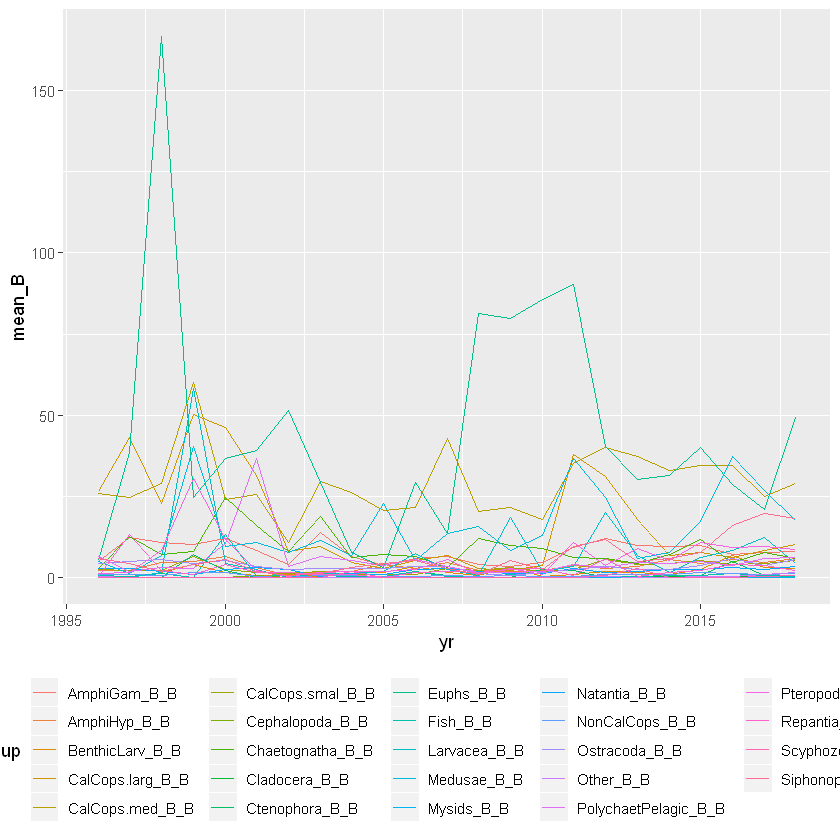

In [39]:
# Libraries
library(ggplot2)

# Plot
seasonal_B_yr_summary %>%
  filter(group != "Total.Biomass_B_B") %>%
  ggplot( aes(x=yr, y=mean_B, group=group, color=group)) +
  theme(legend.position="bottom") +
    geom_line()

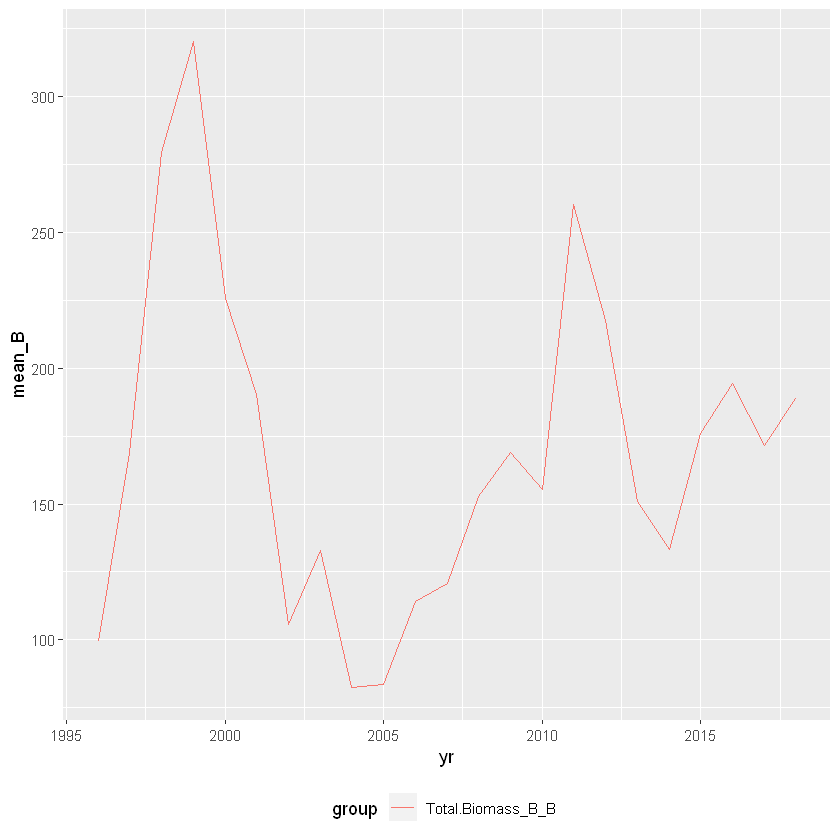

In [40]:
# Plot
seasonal_B_yr_summary %>%
  filter(group == "Total.Biomass_B_B") %>%
  ggplot( aes(x=yr, y=mean_B, group=group, color=group)) +
  theme(legend.position="bottom") +
    geom_line()

In [55]:
colnames(a1996_2018_supp2_df)

[1] "ï..key"           "survey"           "event"            "net"             
 [5] "region"           "station"          "lon"              "lat"             
 [9] "yr"               "mon"              "day"              "time"            
[13] "twilight"         "net.type"         "diam.m"           "mesh.um"         
[17] "startz.m"         "endz.m"           "botz.m"           "volfilt.m3"      
[21] "AmphiGam"         "AmphiHyp"         "BenthicLarv"      "CalCops.larg"    
[25] "CalCops.med"      "CalCops.smal"     "Cephalopoda"      "Chaetognatha"    
[29] "Cladocera"        "Ctenophora"       "Euphs"            "Fish"            
[33] "Larvacea"         "Medusae"          "Mysids"           "Natantia"        
[37] "NonCalCops"       "Ostracoda"        "Other"            "PolychaetPelagic"
[41] "Pteropods"        "Repantia"         "Scyphozoa"        "Siphonophorae"   
[45] "Total.Biomass"    "depthrange"       "season"

In [60]:
# pivot wider and export for EwE time series

ewe_ts = seasonal_B_yr_summary %>%
    pivot_wider(names_from=group,values_from=mean_B) %>%
    mutate(Z3_Amphipods_B = AmphiGam_B_B + AmphiHyp_B_B) %>%
    mutate(Z5_CalCops_B = CalCops.med_B_B + CalCops.smal_B_B) %>%
    mutate(Z2_Euphausiids = Euphs_B_B) %>%
    mutate(Z4_CopeLg = CalCops.larg_B_B) %>%
    mutate(Z1_ichthyomero = Fish_B_B) %>%
    mutate(G3_Ctenophora = Ctenophora_B_B) %>%
    mutate(G2_Medusae = Medusae_B_B)  %>%
    mutate(G1_Scyphozoa = Scyphozoa_B_B) 

write.csv(ewe_ts,file = "piping.csv")

In [1]:
yearround_B_avg %>%
    filter(group != "Total.Biomass_B_B") %>%
    ggplot(aes(area = mean_B, fill = group,label = paste(str_sub(group,1,nchar(group)-4),mean_B,sep="\n"))) +
    geom_treemap() + 
    geom_treemap_text(
         colour = "white",
         place = "center",
         size = 15) + theme(legend.position = "bottom")

ERROR: Error in yearround_B_avg %>% filter(group != "Total.Biomass_B_B") %>% : could not find function "%>%"


ERROR: Error in eval(expr, envir, enclos): object 'yearround_B_avg' not found


In [6]:
# note there are 125 / 760 surveys tagged as night time
a1996_2018_supp2_df %>% filter(twilight == "Night") %>% mutate(mean_euph = mean(Euphs))

ï..key,survey,event,net,region,station,lon,lat,yr,mon,...,Other,PolychaetPelagic,Pteropods,Repantia,Scyphozoa,Siphonophorae,Total.Biomass,depthrange,season,mean_euph
<fct>,<fct>,<int>,<int>,<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>
PBS1997054000201,PBS1997054,2,1,Central Strait of Georgia,GEO1,-123.750,49.250,1997,3,...,0.00000000,4.41203688,0.8106019,0.0000000,0,1.01519712,100.67749,400,spring,28.20623
PBS1997062000201,PBS1997062,2,1,Central Strait of Georgia,GEO1,-123.750,49.250,1997,9,...,0.00000000,0.08652672,0.8907617,7.1922406,0,0.15014304,181.62553,400,fall,28.20623
IOS1997037008701B,IOS1997037,87,1,Central Strait of Georgia,GEO1,-123.750,49.250,1997,10,...,0.00000000,2.30974128,0.0000000,19.1792815,0,1.21449096,484.43604,400,fall,28.20623
PBS1997065000201,PBS1997065,2,1,Central Strait of Georgia,GEO1,-123.750,49.250,1997,12,...,0.00000000,0.00000000,1.0383739,0.7491967,0,2.13293160,130.77837,400,winter,28.20623
PBS1998052000201,PBS1998052,2,1,Central Strait of Georgia,GEO1,-123.750,49.250,1998,2,...,0.00000000,0.34802496,0.5191870,0.0000000,0,1.14043176,130.31494,400,winter,28.20623
IOS1998001002901,IOS1998001,29,1,Central Strait of Georgia,GEO1,-123.750,49.250,1998,2,...,0.00000000,0.84800448,1.2114274,0.0000000,0,0.23286024,78.19533,400,winter,28.20623
PBS1998055000201,PBS1998055,2,1,Central Strait of Georgia,GEO1,-123.750,49.250,1998,3,...,0.00000000,1.03834728,9.4649522,0.0000000,0,0.48364920,161.01831,400,spring,28.20623
IOS1998014005801,IOS1998014,58,1,Northern Strait of Georgia,CPF2,-124.499,49.466,1998,6,...,0.00000000,5.99067033,3.7938010,1.6615074,0,0.67660272,274.77926,249,summer,28.20623
IOS1999009008601,IOS1999009,86,1,Northern Strait of Georgia,CPF2,-124.503,49.464,1999,4,...,0.00000000,0.57715560,21.7601348,0.0000000,0,1.07166060,203.85056,250,spring,28.20623


In [7]:
a1996_2018_supp2_df %>% filter(twilight == "Daylight") %>% mutate(mean_euph = mean(Euphs))

ï..key,survey,event,net,region,station,lon,lat,yr,mon,...,Other,PolychaetPelagic,Pteropods,Repantia,Scyphozoa,Siphonophorae,Total.Biomass,depthrange,season,mean_euph
<fct>,<fct>,<int>,<int>,<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>
PBS1996051000101,PBS1996051,1,1,Central Strait of Georgia,GEO1,-123.748,49.250,1996,2,...,0.77367888,2.59590816,1.1401654,0.00000000,0,2.59335072,72.29715,400,winter,44.6719
PBS1996051000201,PBS1996051,2,1,Central Strait of Georgia,GEO1,-123.748,49.250,1996,2,...,0.00000000,1.93869936,0.4835426,0.00000000,0,1.73245248,116.96513,400,winter,44.6719
PBS1996053000201A,PBS1996053,2,1,Central Strait of Georgia,GEO1,-123.748,49.250,1996,4,...,0.00000000,6.14369016,0.6922404,0.04582080,0,1.03315248,104.81535,400,spring,44.6719
PBS1996053000201B,PBS1996053,2,1,Central Strait of Georgia,GEO1,-123.748,49.250,1996,4,...,0.11452536,6.53306040,1.1376079,0.82765152,0,0.30031272,104.33143,400,spring,44.6719
PBS1997051000101,PBS1997051,1,1,Central Strait of Georgia,GEO1,-123.750,49.250,1997,1,...,0.00000000,3.76537752,0.4453675,0.00000000,0,0.37538424,86.20081,400,winter,44.6719
PBS1997055000101,PBS1997055,1,1,Central Strait of Georgia,GEO1,-123.750,49.250,1997,4,...,0.00000000,1.08163728,0.4326602,0.06516144,0,0.07507152,25.55048,400,spring,44.6719
PBS1997059000201,PBS1997059,2,1,Central Strait of Georgia,GEO1,-123.750,49.250,1997,6,...,0.00000000,0.00000000,1.9291356,29.53243800,0,2.27777328,140.61098,400,summer,44.6719
PBS1997060000101,PBS1997060,1,1,Central Strait of Georgia,GEO1,-123.750,49.250,1997,7,...,0.00000000,0.08652672,6.1487784,7.46452800,0,3.70298664,125.48695,400,summer,44.6719
PBS1997060000201,PBS1997060,2,1,Central Strait of Georgia,GEO1,-123.750,49.250,1997,7,...,0.00000000,0.47720232,0.6922404,20.26853784,0,1.91895912,160.16370,400,summer,44.6719


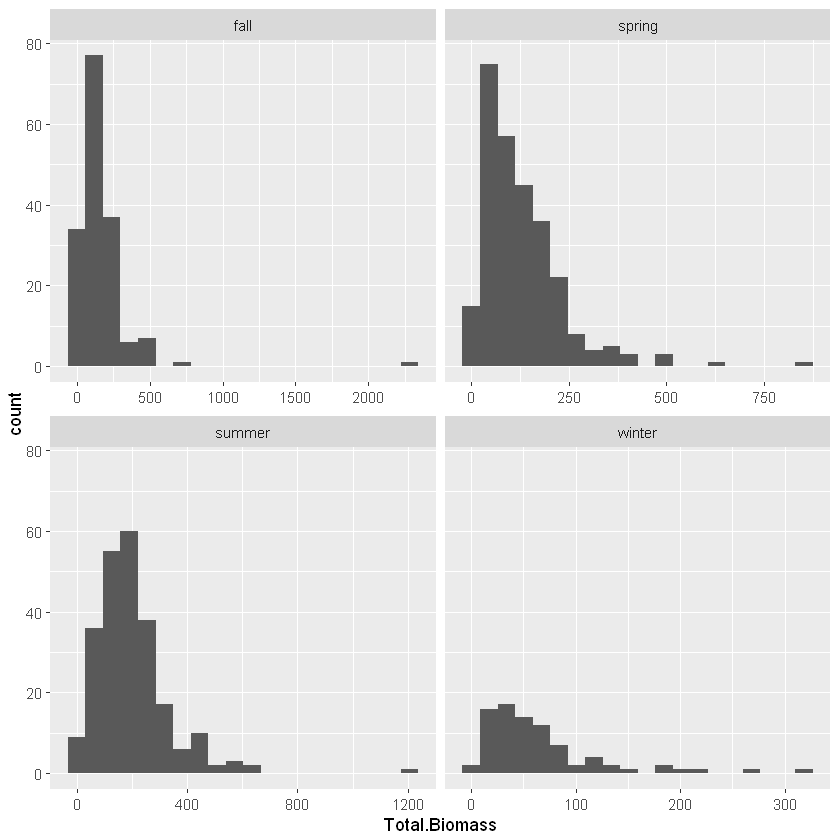

In [10]:
# look at total zoop biomass distribution by season
a1996_2018_supp2_df %>%
  ggplot(aes(x=Total.Biomass)) + 
  geom_histogram(bins=20) + 
  facet_wrap(~season, scales = 'free_x')

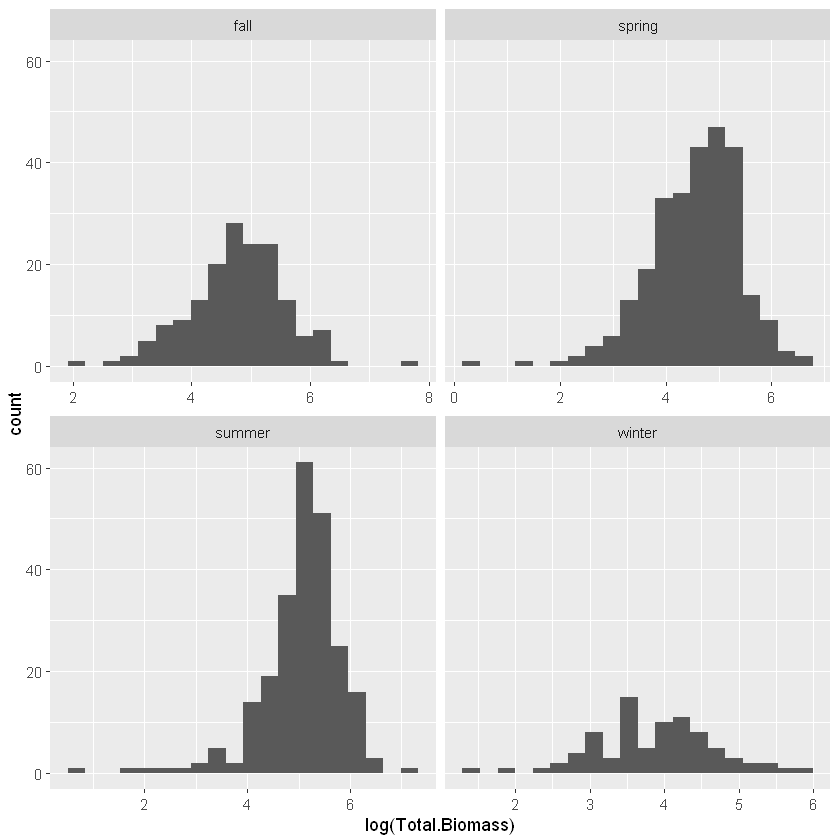

In [11]:
# log (base e) transform data

a1996_2018_supp2_df %>%
  ggplot(aes(x=log(Total.Biomass))) + 
  geom_histogram(bins=20) + 
  facet_wrap(~season, scales = 'free_x')

# log (base 10) transform the data
#a1996_2018_supp1_df %>%
#  ggplot(aes(x=log10(TotalBiomass_WW_gm2))) + 
#  geom_histogram(bins=20) + 
#  facet_wrap(~season, scales = 'free_x')

# log (base 2) transform the data
#a1996_2018_supp1_df %>%
#  ggplot(aes(x=log2(TotalBiomass_WW_gm2))) + 
#  geom_histogram(bins=20) + 
#  facet_wrap(~season, scales = 'free_x')

### shapiro-wilk tests for log transformations imrpoving distributions? 
#### Log transformation of total biomasses improves the chances that the distribution is normal (versus untransformed total biomasses)

In [13]:
# tests for lognormal distribution
winter = a1996_2018_supp2_df %>%
  filter(season == "winter")
print("winter B - Shapiro-Wilk normal test")
shapiro.test(winter$Total.Biomass)
print("winter logB - Shapiro-Wilk lognormal test")
shapiro.test(log(winter$Total.Biomass))

spring = a1996_2018_supp2_df %>%
  filter(season == "spring")
print("spring B - Shapiro-Wilk normal test")
shapiro.test(spring$Total.Biomass)
print("spring logB - Shapiro-Wilk lognormal test")
shapiro.test(log(spring$Total.Biomass))

summer = a1996_2018_supp2_df %>%
  filter(season == "summer")
print("Summer B - Shapiro-Wilk normal test")
shapiro.test(summer$Total.Biomass)
print("Summer logB - Shapiro-Wilk lognormal test")
shapiro.test(log(summer$Total.Biomass))

fall = a1996_2018_supp2_df %>%
  filter(season == "fall")
print("Fall B - Shapiro-Wilk normal test")
shapiro.test(fall$Total.Biomass)
print("Fall logB - Shapiro-Wilk lognormal test")
shapiro.test(log(fall$Total.Biomass))

[1] "winter B - Shapiro-Wilk normal test"



	Shapiro-Wilk normality test

data:  winter$Total.Biomass
W = 0.78384, p-value = 1.06e-09


[1] "winter logB - Shapiro-Wilk lognormal test"



	Shapiro-Wilk normality test

data:  log(winter$Total.Biomass)
W = 0.99043, p-value = 0.804


[1] "spring B - Shapiro-Wilk normal test"



	Shapiro-Wilk normality test

data:  spring$Total.Biomass
W = 0.80494, p-value < 2.2e-16


[1] "spring logB - Shapiro-Wilk lognormal test"



	Shapiro-Wilk normality test

data:  log(spring$Total.Biomass)
W = 0.96482, p-value = 2.969e-06


[1] "Summer B - Shapiro-Wilk normal test"



	Shapiro-Wilk normality test

data:  summer$Total.Biomass
W = 0.8413, p-value = 6.406e-15


[1] "Summer logB - Shapiro-Wilk lognormal test"



	Shapiro-Wilk normality test

data:  log(summer$Total.Biomass)
W = 0.90158, p-value = 2.077e-11


[1] "Fall B - Shapiro-Wilk normal test"



	Shapiro-Wilk normality test

data:  fall$Total.Biomass
W = 0.47574, p-value < 2.2e-16


[1] "Fall logB - Shapiro-Wilk lognormal test"



	Shapiro-Wilk normality test

data:  log(fall$Total.Biomass)
W = 0.98602, p-value = 0.1019


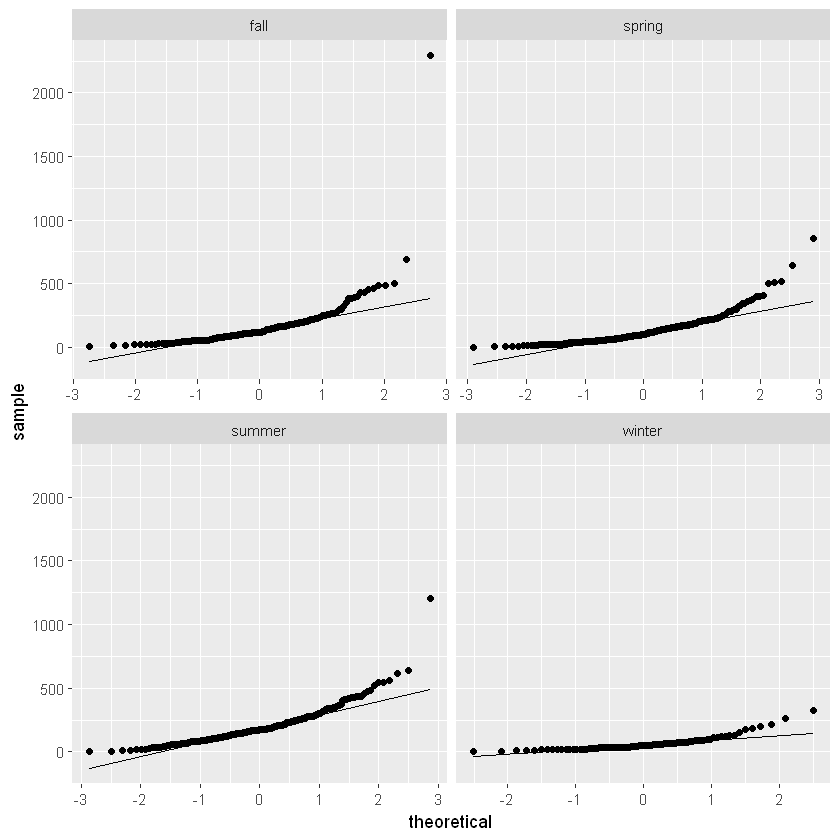

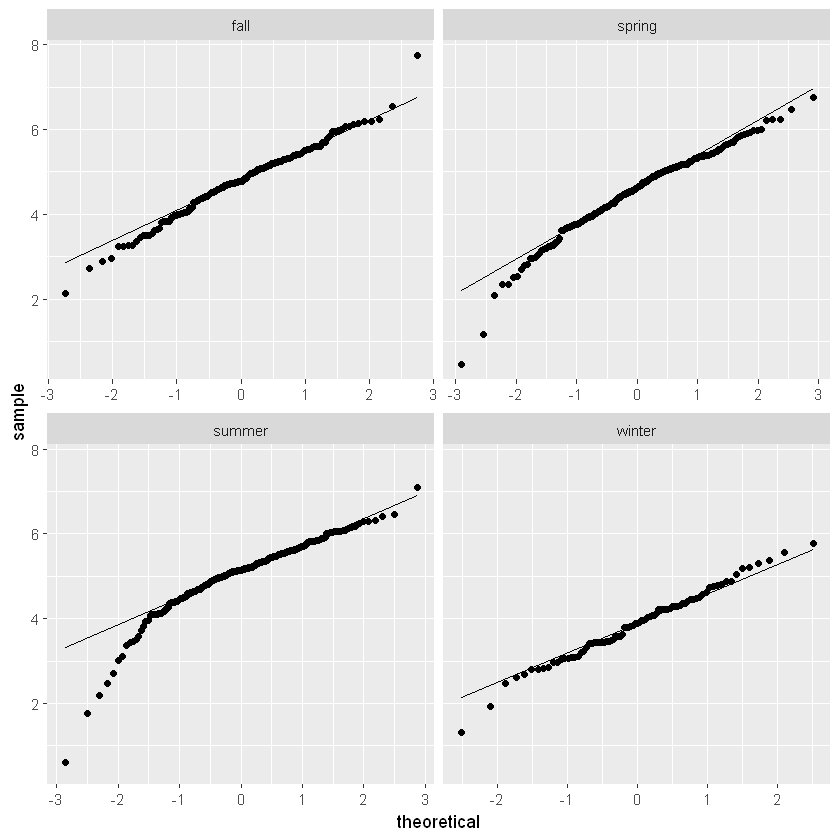

In [14]:
# visualize using Q-Q
a1996_2018_supp2_df %>% 
  ggplot(aes(sample=Total.Biomass)) + 
  stat_qq() + stat_qq_line() +
  facet_wrap(~season, scales = 'free_x')

a1996_2018_supp2_df %>% 
  ggplot(aes(sample=log(Total.Biomass))) + 
  stat_qq() + stat_qq_line() +
  facet_wrap(~season, scales = 'free_x')

### disregard this section (old code for later)

In [15]:
# calculate the expected value 
#https://brilliant.org/wiki/log-normal-distribution/
summary(a1996_2018_supp2_df['Total.Biomass'])
mean_b = mean(a1996_2018_supp2_df$'Total.Biomass')
stdev_b = sd(a1996_2018_supp2_df$'Total.Biomass')

summary(log(a1996_2018_supp2_df['Total.Biomass']))
mean_logb = mean(log(a1996_2018_supp2_df$'Total.Biomass'))
stdev_logb = sd(log(a1996_2018_supp2_df$'Total.Biomass'))

#logmean explained in link above
# the 'expected value' is hard to interpret but I believe it's just converting back to the untransformed mean
expected = exp(mean_logb + stdev_logb^2/2)
mean_logb
stdev_logb
print("the log-mean:")
exp(mean_logb)
expected

 Total.Biomass     
 Min.   :   1.593  
 1st Qu.:  62.991  
 Median : 120.290  
 Mean   : 151.883  
 3rd Qu.: 196.905  
 Max.   :2290.953  

 Total.Biomass   
 Min.   :0.4655  
 1st Qu.:4.1430  
 Median :4.7899  
 Mean   :4.6806  
 3rd Qu.:5.2827  
 Max.   :7.7367  

[1] 4.680631

[1] 0.8963223

[1] 107.8381

[1] 161.1488

`summarise()` ungrouping output (override with `.groups` argument)


season,meanB_,meanlogB_,stddevlogB_,n_,logmean_B1,logmean_B2
<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
fall,165.78,4.77,0.81,163,163.7024,117.91924
spring,128.79,4.54,0.86,275,135.6123,93.69080
summer,199.02,5.06,0.79,239,215.3038,157.59052
winter,65.37,3.86,0.82,83,66.4334,47.46535


### Below are some tests for log-normality and fiddling with code on a species group level with Supp Tab 2 

In [17]:
colnames(a1996_2018_supp2_df)

[1] "ï..key"           "survey"           "event"            "net"             
 [5] "region"           "station"          "lon"              "lat"             
 [9] "yr"               "mon"              "day"              "time"            
[13] "twilight"         "net.type"         "diam.m"           "mesh.um"         
[17] "startz.m"         "endz.m"           "botz.m"           "volfilt.m3"      
[21] "AmphiGam"         "AmphiHyp"         "BenthicLarv"      "CalCops.larg"    
[25] "CalCops.med"      "CalCops.smal"     "Cephalopoda"      "Chaetognatha"    
[29] "Cladocera"        "Ctenophora"       "Euphs"            "Fish"            
[33] "Larvacea"         "Medusae"          "Mysids"           "Natantia"        
[37] "NonCalCops"       "Ostracoda"        "Other"            "PolychaetPelagic"
[41] "Pteropods"        "Repantia"         "Scyphozoa"        "Siphonophorae"   
[45] "Total.Biomass"    "depthrange"       "season"

In [371]:
# Shapiro-wilks test of ecological group biomass distributions
# select biomass columns and season col
# replace zeros because the shapiro.test can't handle
temp = a1996_2018_supp2_df %>%
  dplyr::select(,c(21:40,47)) %>% 
  replace(., . == 0, 0.001)

# alternatively filter out zeros
temp = a1996_2018_supp1_df %>%
  dplyr::select(,c(21:45,47)) %>% 
  replace(., . == 0, NA)

# alternatively add a small constant to eliminate zeros before doing lognormal tests
temp = a1996_2018_supp1_df %>%
  dplyr::select(,c(21:45,47)) %>% 
  mutate_if(is.numeric, ~.+0.001)

# note that tests for lognormality encounter issues dealing with zeros (Zidan et al 2011)

In [375]:
meanfish = mean(log(temp$Fish),na.rm=TRUE)
sd_fish = sd(log(temp$Fish), na.rm=TRUE)
meanfish
sd_fish
exp(meanfish + sd_fish^2/2)


[1] -0.6255485

[1] 2.012354

[1] 4.052099

In [308]:
temp %>% 
dplyr::select(,c(0:25)) %>%
summarise_all(.funs = funs(p.value = shapiro.test(log(.))$p.value))

AmphiGam_p.value,AmphiHyp_p.value,BenthicLarv_p.value,CalCops.larg_p.value,CalCops.med_p.value,CalCops.smal_p.value,Cephalopoda_p.value,Chaetognatha_p.value,Cladocera_p.value,Ctenophora_p.value,...,Natantia_p.value,NonCalCops_p.value,Ostracoda_p.value,Other_p.value,PolychaetPelagic_p.value,Pteropods_p.value,Repantia_p.value,Scyphozoa_p.value,Siphonophorae_p.value,Total.Biomass_p.value
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.382814e-34,2.515651e-20,1.585483e-13,7.220266e-22,6.357353e-21,1.101239e-16,9.330348e-42,1.071892e-22,2.219092e-39,7.638442e-34,...,4.771481e-24,7.096587e-19,4.214068e-32,2.262523e-30,1.490484e-29,3.919068e-28,7.201333e-26,1.316556e-49,4.679262e-23,1.681539e-11


In [376]:
expected_B_df = temp %>% 
  dplyr::select(,c(0:24)) %>%
  summarise_all(.funs = funs(logmeanB_WW_mtkm2 = round(exp(mean(log(.), na.rm=TRUE)+sd(log(.), na.rm=TRUE)^2/2),digits=2)))
expected_B = pivot_longer(expected_B_df,0:24, names_to = "group", values_to = "logmean_B")
arrange(logmean_B, desc(logmean_B), .by_group = FALSE)

expected_B_df = temp %>% 
  dplyr::select(,c(0:24)) %>%
  summarise_all(.funs = funs(logmeanB_WW_mtkm2 = round((mean(log(.), na.rm=TRUE),digits=2)))

group,logmean_B
<chr>,<dbl>
Euphs_logmeanB_WW_mtkm2,78.56
CalCops.med_logmeanB_WW_mtkm2,33.29
CalCops.larg_logmeanB_WW_mtkm2,21.59
AmphiGam_logmeanB_WW_mtkm2,16.11
Medusae_logmeanB_WW_mtkm2,10.07
Ostracoda_logmeanB_WW_mtkm2,9.19
AmphiHyp_logmeanB_WW_mtkm2,8.70
Pteropods_logmeanB_WW_mtkm2,7.65
Scyphozoa_logmeanB_WW_mtkm2,5.60


In [378]:
mean_B = a1996_2018_supp1_df %>%
  dplyr::select(,c(21:45,47)) %>%
  summarise_all(.funs = funs(meanB_WW_mtkm2 = round(mean(., na.rm=TRUE),digits=2))) %>% 
  pivot_longer(0:24, names_to = "group", values_to = "mean_B")
arrange(mean_B, desc(mean_B), .by_group = FALSE)

Warning message in mean.default(season, na.rm = TRUE):
"argument is not numeric or logical: returning NA"

Total.Biomass_meanB_WW_mtkm2,season_meanB_WW_mtkm2,group,mean_B
<dbl>,<dbl>,<chr>,<dbl>
151.88,NA,Euphs_meanB_WW_mtkm2,41.96
151.88,NA,CalCops.med_meanB_WW_mtkm2,29.17
151.88,NA,CalCops.larg_meanB_WW_mtkm2,14.07
151.88,NA,AmphiGam_meanB_WW_mtkm2,13.37
151.88,NA,AmphiHyp_meanB_WW_mtkm2,7.49
151.88,NA,Medusae_meanB_WW_mtkm2,6.67
151.88,NA,Ostracoda_meanB_WW_mtkm2,6.67
151.88,NA,Pteropods_meanB_WW_mtkm2,6.05
151.88,NA,CalCops.smal_meanB_WW_mtkm2,4.05


In [338]:
ncol(mean_B)

[1] 25

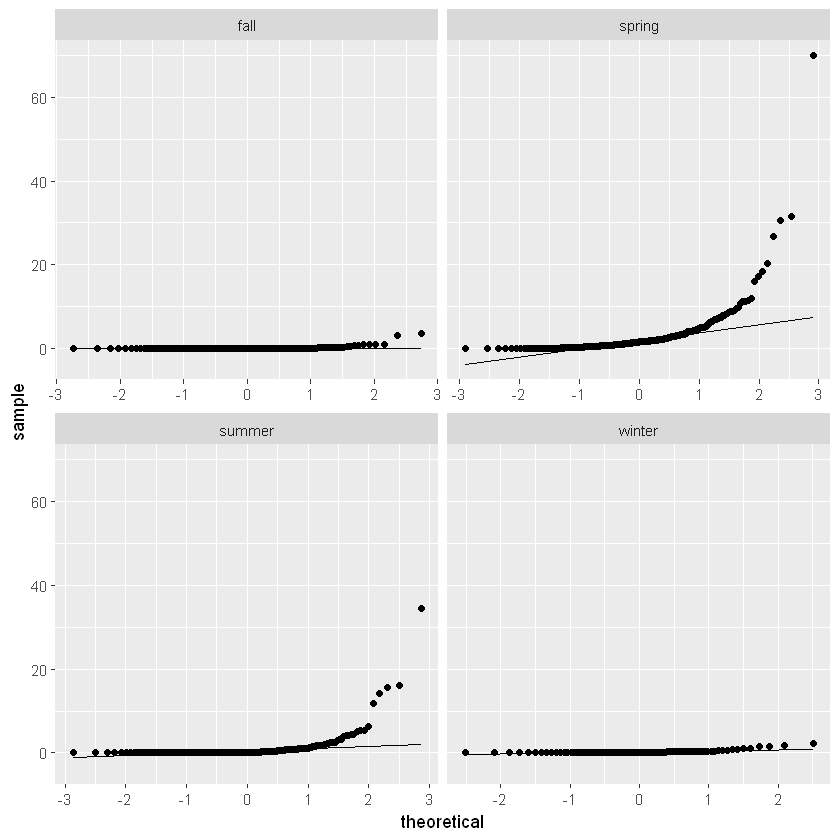

In [360]:
temp %>% 
  ggplot(aes(sample=(Fish))) + 
  stat_qq() + stat_qq_line() +
  facet_wrap(~season, scales = 'free_x')

Warning message:
"Removed 25 rows containing non-finite values (stat_bin)."

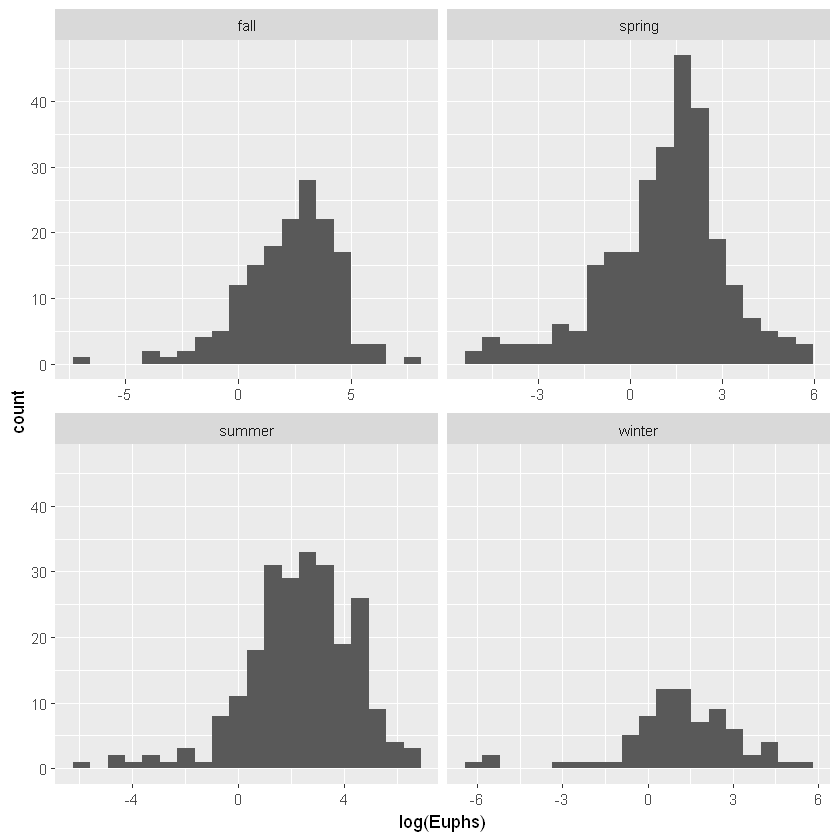

In [201]:
temp %>%
  ggplot(aes(x=log(Euphs))) + 
  geom_histogram(bins=20) + 
  facet_wrap(~season, scales = 'free_x')


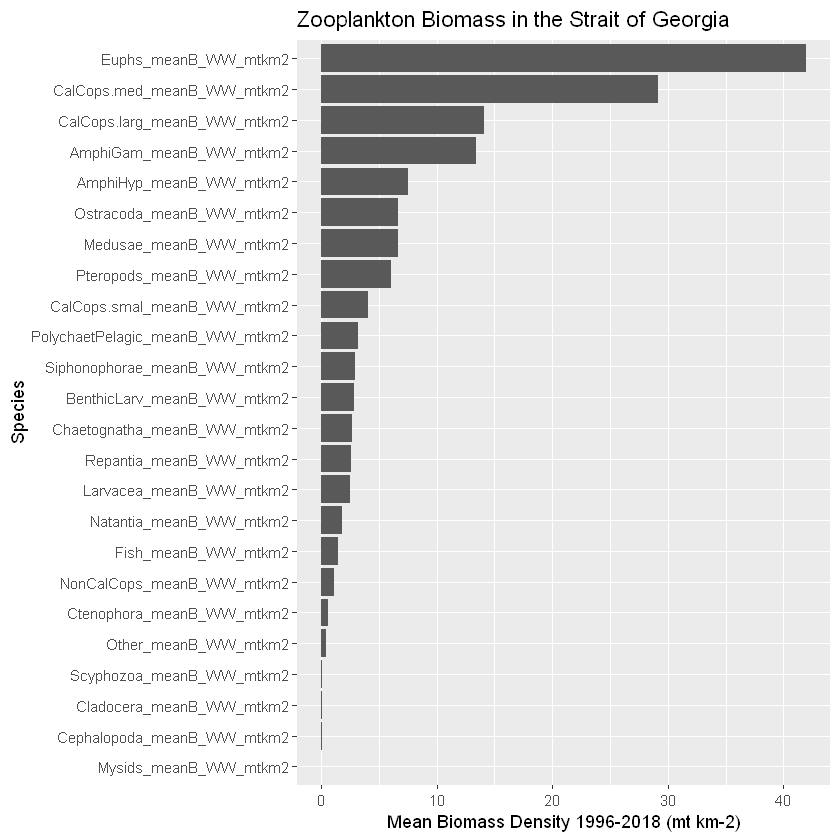

In [384]:
library(ggplot2)
library(RColorBrewer)

# Basic barplot
p<-ggplot(data=mean_B, 
          aes(x=reorder(group,mean_B), 
              y=mean_B)) +
  geom_bar(stat="identity") + 
scale_fill_brewer(palette="Paired") +
labs(title="Zooplankton Biomass in the Strait of Georgia", x="Species", y = "Mean Biomass Density 1996-2018 (mt km-2)")
# note https://www.r-graph-gallery.com/38-rcolorbrewers-palettes.html

# Horizontal bar plot
p + coord_flip()

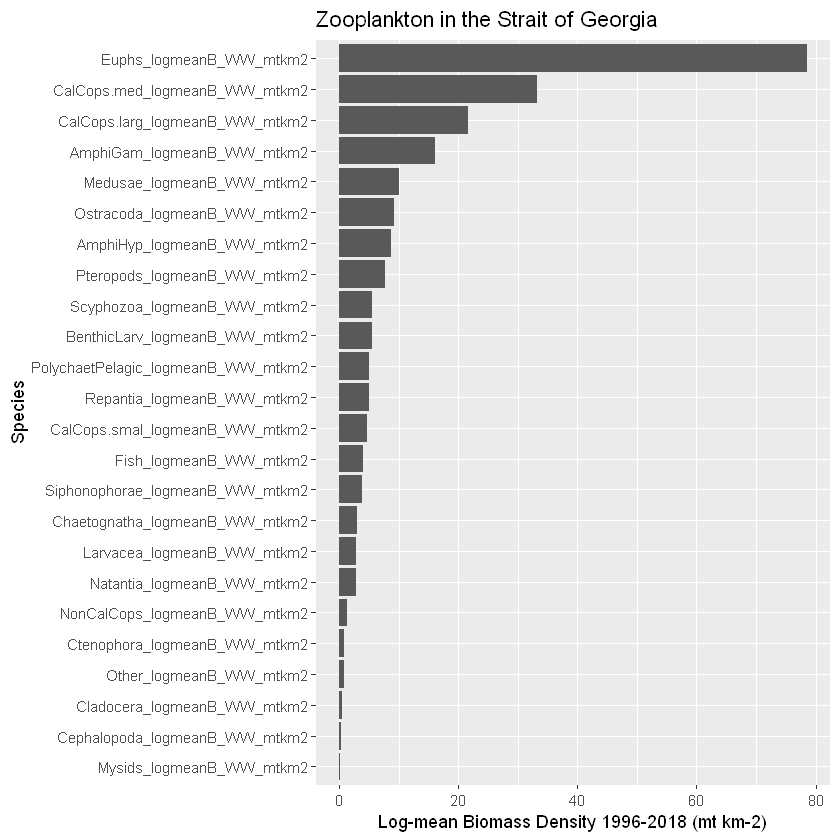

In [385]:
# Basic barplot
p<-ggplot(data=logmean_B, 
          aes(x=reorder(group,logmean_B), 
              y=logmean_B)) +
  geom_bar(stat="identity") + 
scale_fill_brewer(palette="Paired") +
labs(title="Zooplankton in the Strait of Georgia", x="Species", y = "Log-mean Biomass Density 1996-2018 (mt km-2)")
# note https://www.r-graph-gallery.com/38-rcolorbrewers-palettes.html

# Horizontal bar plot
p + coord_flip()

# SECTION 2 - Explore Raw data from GoC Open data Site
### Uncertain if data are inflating euphausiids correction factor (3x) and by grouping into species groups
### Objective is to determine dominant taxa by mean biomass at the 'order' level
### Ideally we'd use the same 'levels' for this as the authors used to group but that isn't possible to recreate without more information, especially for how they grouped copepods. 

In [172]:
a1996_2018_df <- read.csv("ORIGINAL/Zoopl_SofG_1996-2018_EN.csv")
head(a1996_2018_df)

# correspondence with I. Perry and K. Young Nov 16 2021
# - the mg m-2 is calculated using the tow start - end depth
# calculate the tow depth range
a1996_2018_df['tow_depth_range'] = abs(a1996_2018_df['Tow_start_depth.m.'])-abs(a1996_2018_df['Tow_end_depth.m.'])
summary(a1996_2018_df['tow_depth_range'])

## convert DW to WW using same method as previous section
# create a season field
a1996_2018_df = a1996_2018_df %>%
 mutate(B_mg_m3_DW = Abundance.m3. * Average_biomass_per_individual.mg.) %>% # convert to mg m-3
 mutate(B_g_m2_DW = B_mg_m3_DW * tow_depth_range * mg_to_g) %>%  # mg m-3 to g m-2
 mutate(B_g_m2_WW = B_g_m2_DW * DW_to_WW ) %>% # DW to WW
 mutate(season = case_when(Month == 12 | Month == 1 | Month == 2 ~ "winter", 
                            Month == 3 | Month == 4 | Month == 5 ~ "spring", 
                            Month == 6 | Month == 7 | Month == 8 ~ "summer",  
                            Month == 9 | Month == 10 | Month == 11 ~ "fall")) 
nrow(a1996_2018_df)
# Perry et al selected start depths with gt 150 m and  those with start depths <150 where 
# the tow depth range was gt 70% of the water column
a1996_2018_df = a1996_2018_df %>% 
  mutate(towrange_as_prop_watercol = tow_depth_range / Bottom_depth.m.) %>%
  filter(towrange_as_prop_watercol >= 0.7 | Tow_start_depth.m. >= 150)
nrow(a1996_2018_df)

arrange(a1996_2018_df, desc(B_g_m2_WW), .by_group = FALSE)

# seems like the filter above was already applied

Index,Region,Station,Longitude..N.,Latitude..W.,Year,Month,Day,Time,Twilight,...,Phylum,Class,Order,Family,Genus,Species,Genus_species,Size_class_or_life_stage,Abundance.m3.,Average_biomass_per_individual.mg.
<fct>,<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
PBS1996051000101,Central Strait of Georgia,GEO1,-123.748,49.25,1996,2,12,12:00,Daylight,...,Annelida,Polychaeta,Aciculata,Tomopteridae,Tomopteris,septentrionalis,Tomopteris.septentrionalis,Tomopteris septentrionalis s2,2.86601,0.3399988
PBS1996051000101,Central Strait of Georgia,GEO1,-123.748,49.25,1996,2,12,12:00,Daylight,...,Arthropoda,Malacostraca,Amphipoda,Cyphocarididae,Cyphocaris,challengeri,Cyphocaris.challengeri,Cyphocaris challengeri s2,0.09553,3.3001151
PBS1996051000101,Central Strait of Georgia,GEO1,-123.748,49.25,1996,2,12,12:00,Daylight,...,Arthropoda,Malacostraca,Amphipoda,Cyphocarididae,Cyphocaris,challengeri,Cyphocaris.challengeri,Cyphocaris challengeri s3,0.38214,5.6999267
PBS1996051000101,Central Strait of Georgia,GEO1,-123.748,49.25,1996,2,12,12:00,Daylight,...,Arthropoda,Malacostraca,Amphipoda,Hyperiidae,Themisto,pacifica,Themisto.pacifica,Themisto pacifica M,0.04777,2.0998535
PBS1996051000101,Central Strait of Georgia,GEO1,-123.748,49.25,1996,2,12,12:00,Daylight,...,Arthropoda,Malacostraca,Amphipoda,Scinidae,Scina,borealis,Scina.borealis,Scina borealis F,0.02388,2.5904523
PBS1996051000101,Central Strait of Georgia,GEO1,-123.748,49.25,1996,2,12,12:00,Daylight,...,Arthropoda,Malacostraca,Amphipoda,Scinidae,Scina,borealis,Scina.borealis,Scina borealis M,0.03583,2.5897293


 tow_depth_range
 Min.   : 48.0  
 1st Qu.:231.0  
 Median :290.0  
 Mean   :277.2  
 3rd Qu.:344.0  
 Max.   :420.0  

[1] 81544

[1] 81544

Index,Region,Station,Longitude..N.,Latitude..W.,Year,Month,Day,Time,Twilight,...,Genus_species,Size_class_or_life_stage,Abundance.m3.,Average_biomass_per_individual.mg.,tow_depth_range,B_mg_m3_DW,B_g_m2_DW,B_g_m2_WW,season,towrange_as_prop_watercol
<fct>,<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>,<fct>,<fct>,...,<fct>,<fct>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
PBS2009046001401,Northern Strait of Georgia,GS07,-124.937,49.829,2009,10,9,9:42,Daylight,...,Euphausia.pacifica,Euphausia pacifica F,87.38498,8.5000001,150,742.77234,111.41585,742.02957,fall,0.7978723
IOS2018039016301,Northern Strait of Georgia,12,-124.680,49.725,2018,5,17,2:28,Night,...,Euphausia.pacifica,Euphausia pacifica s2,268.65825,0.6500000,343,174.62786,59.89736,398.91639,spring,0.9716714
IOS2015021015501,Northern Strait of Georgia,24,-124.098,49.504,2015,9,13,21:52,Night,...,Euphausia.pacifica,Euphausia pacifica F,13.64008,8.4999993,420,115.94067,48.69508,324.30924,fall,0.9882353
PBS1998017000401,Central Strait of Georgia,CPF1,-124.086,49.367,1998,7,15,21:02,Daylight,...,Euphausia.pacifica,Euphausia pacifica F,19.90832,8.4999985,250,169.22069,42.30517,281.75245,summer,1.0000000
IOS1997037008701B,Central Strait of Georgia,GEO1,-123.750,49.250,1997,10,28,12:00,Night,...,Neocalanus.plumchrus,Neocalanus plumchrus 5,152.85407,0.5500000,400,84.06974,33.62790,223.96179,fall,1.0000000
PBS2009046001801,Northern Strait of Georgia,GS09,-124.714,49.814,2009,10,9,11:21,Daylight,...,Euphausia.pacifica,Euphausia pacifica F,24.93639,8.4999990,140,211.95929,29.67430,197.63084,fall,0.9090909
IOS2018039016101,Northern Strait of Georgia,11,-124.721,49.708,2018,5,17,1:24,Night,...,Euphausia.pacifica,Euphausia pacifica s2,145.86325,0.6500000,293,94.81111,27.77966,185.01250,spring,0.9669967
IOS2012025013601,Northern Strait of Georgia,CPF2,-124.501,49.467,2012,5,21,5:26,Daylight,...,Neocalanus.plumchrus,Neocalanus plumchrus 5,151.37976,0.5500000,315,83.25887,26.22654,174.66878,spring,0.9692308
PBS2008014034001,Northern Strait of Georgia,GS11,-124.936,49.832,2008,7,4,16:46,Daylight,...,Euphausia.pacifica,Euphausia pacifica F,19.81599,8.5000018,150,168.43595,25.26539,168.26751,summer,0.8064516


In [141]:
euphausiids_check = a1996_2018_df %>%
  filter(Family == "Euphausiidae") %>%
  group_by(Index,season,Year) %>%
  summarise(B_mg_m3_DW_sum = round(sum(B_mg_m3_DW, na.rm=FALSE),digits=2),
           B_g_m2_DW_sum = round(sum(B_g_m2_DW, na.rm=FALSE),digits=2)) %>%
  group_by(Year) %>%
  summarize(B_mg_m3_DW_avg = round(mean(B_mg_m3_DW_sum),digits=2),
           B_g_m2_DW_avg = round(mean(B_g_m2_DW_sum),digits=2)) %>%
  mutate(B_g_m2_WW_avg = B_g_m2_DW_avg * DW_to_WW)
euphausiids_check

`summarise()` regrouping output by 'Index', 'season' (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)


Year,B_mg_m3_DW_avg,B_g_m2_DW_avg,B_g_m2_WW_avg
<int>,<dbl>,<dbl>,<dbl>
1996,0.58,0.23,1.5318
1997,6.33,2.53,16.8498
1998,27.33,7.27,48.4182
1999,7.46,1.85,12.3210
2000,18.39,4.42,29.4372
2001,11.05,2.73,18.1818
2002,14.83,3.71,24.7086
2003,11.20,2.95,19.6470
2004,3.80,0.94,6.2604


In [136]:
colnames(a1996_2018_df)
n_surveys = n_distinct(a1996_2018_df[c('Index')])
n_surveys
distinct(a1996_2018_df[c('Region')])

[1] "Index"                              "Region"                            
 [3] "Station"                            "Longitude..N."                     
 [5] "Latitude..W."                       "Year"                              
 [7] "Month"                              "Day"                               
 [9] "Time"                               "Twilight"                          
[11] "Net_type"                           "Net_Diameter.m."                   
[13] "Mesh_size.µm."                      "Tow_start_depth.m."                
[15] "Tow_end_depth.m."                   "Bottom_depth.m."                   
[17] "Volume.m3."                         "Phylum"                            
[19] "Class"                              "Order"                             
[21] "Family"                             "Genus"                             
[23] "Species"                            "Genus_species"                     
[25] "Size_class_or_life_stage"           "Abundance.m3."                     
[27] "Average_biomass_per_individual.mg." "tow_depth_range"                   
[29] "B_mg_m3_DW"                         "B_g_m2_DW"                         
[31] "B_g_m2_WW"                          "season"                            
[33] "towrange_as_prop_watercol"

[1] 760

Region
<fct>
Central Strait of Georgia
Northern Strait of Georgia


In [329]:
a1996_2018_df %>% group_by(Genus_species) %>%
  summarise(mean_weight = round(mean(Average_biomass_per_individual.mg.),digits=2)) %>%
  

ERROR: Error in parse(text = x, srcfile = src): <text>:3:0: unexpected end of input
1: a1996_2018_df %>% group_by(Genus_species) %>%
2:   summarise(mean_weight = round(mean(Average_biomass_per_individual.mg.),digits=2)) %>%
  ^


In [208]:
# calculate mean biomass by season and year and the mean across seasons and year (annual mean)
# note that Perry et al dump years with no observations in either spring or summer - don't think there are any so didn't do that here
# taking care here when calculating means to account for years with zeros (records that aren't present at species level)

n_years = 23

# CAREFUL NOT TO TAKE MEAN without first summing to the coarsest taxonomic group by survey (index)

a1996_2018_df_meanseasonalyearB = a1996_2018_df %>%
  group_by(Phylum, Class, Order, Family, Genus, Genus_species, season, Year) %>%
  #group_by(Class, season, Year) %>%
  summarise(meanB_seasonalyear_WW_mtkm2 = round(mean(B_g_m2_WW, na.rm=FALSE),digits=2))
arrange(a1996_2018_df_meanseasonalyearB, desc(meanB_seasonalyear_WW_mtkm2), .by_group = FALSE)

# here, in between code above and below is where filter for observations in either spring or summer
# should be used to filter data to match methods of Perry et al 2021

a1996_2018_df_meanyearB = a1996_2018_df_meanseasonalyearB %>%
  group_by(Phylum, Class, Order, Family, Genus, Genus_species, Year) %>%
  #group_by(Class, Year) %>%
  summarise(meanB_year_WW_mtkm2 = round(mean(meanB_seasonalyear_WW_mtkm2, na.rm=FALSE),digits=2))
arrange(a1996_2018_df_meanyearB, desc(meanB_year_WW_mtkm2), .by_group = FALSE)

a1996_2018_df_meanannualB_species = a1996_2018_df_meanyearB %>%
  group_by(Phylum, Class, Order, Family, Genus, Genus_species) %>%
  #group_by(Class) %>%
  summarise(meanB_annual_WW_mtkm2 = round(sum(meanB_year_WW_mtkm2, na.rm=FALSE)/n_years,digits=2)) %>%
  filter(meanB_annual_WW_mtkm2 > 0)
sum(a1996_2018_df_meanannualB_species$meanB_annual_WW_mtkm2)
  #pivot_longer(0:24, names_to = "group", values_to = "mean_B")
arrange(a1996_2018_df_meanannualB_species, desc(meanB_annual_WW_mtkm2), .by_group = FALSE)

a1996_2018_df_meanannualB_species %>%
  group_by(Phylum, Class, Order, Family, Genus, Genus_species) %>%
  summarise(meanB_annual_WW_mtkm2 = round(sum(meanB_annual_WW_mtkm2, na.rm=FALSE),digits=2)) %>%
  arrange(desc(meanB_annual_WW_mtkm2), .by_group = FALSE)

`summarise()` regrouping output by 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Genus_species', 'season' (override with `.groups` argument)


Phylum,Class,Order,Family,Genus,Genus_species,season,Year,meanB_seasonalyear_WW_mtkm2
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<int>,<dbl>
Arthropoda,Maxillopoda,Calanoida,Calanidae,Neocalanus,Neocalanus.plumchrus,fall,1997,105.82
Arthropoda,Maxillopoda,Calanoida,Calanidae,Neocalanus,Neocalanus.plumchrus,summer,2011,76.87
Chordata,Actinopterygii,Osmeriformes,Bathylagidae,Bathylagus,Bathylagus.*sp.,spring,2000,69.54
Arthropoda,Maxillopoda,Calanoida,Calanidae,Neocalanus,Neocalanus.plumchrus,spring,2000,69.38
Arthropoda,Maxillopoda,Calanoida,Calanidae,Neocalanus,Neocalanus.plumchrus,spring,2012,65.87
Arthropoda,Maxillopoda,Calanoida,Calanidae,Neocalanus,Neocalanus.plumchrus,fall,2011,50.71
Arthropoda,Maxillopoda,Calanoida,Calanidae,Neocalanus,Neocalanus.plumchrus,summer,1997,42.55
Arthropoda,Maxillopoda,Calanoida,Calanidae,Neocalanus,Neocalanus.plumchrus,fall,2013,38.39
Arthropoda,Maxillopoda,Calanoida,Calanidae,Neocalanus,Neocalanus.plumchrus,spring,1999,37.14


`summarise()` regrouping output by 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Genus_species' (override with `.groups` argument)


Phylum,Class,Order,Family,Genus,Genus_species,Year,meanB_year_WW_mtkm2
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>
Chordata,Actinopterygii,Osmeriformes,Bathylagidae,Bathylagus,Bathylagus.*sp.,2000,69.54
Arthropoda,Maxillopoda,Calanoida,Calanidae,Neocalanus,Neocalanus.plumchrus,2000,49.43
Arthropoda,Maxillopoda,Calanoida,Calanidae,Neocalanus,Neocalanus.plumchrus,2011,42.54
Arthropoda,Maxillopoda,Calanoida,Calanidae,Neocalanus,Neocalanus.plumchrus,1997,42.50
Arthropoda,Maxillopoda,Calanoida,Calanidae,Neocalanus,Neocalanus.plumchrus,2012,38.63
Arthropoda,Maxillopoda,Calanoida,Calanidae,Neocalanus,Neocalanus.plumchrus,1999,34.44
Chordata,Actinopterygii,Clupeiformes,Clupeiformes,Clupeiformes,Clupeiformes.*sp.,1998,22.68
Arthropoda,Maxillopoda,Calanoida,Calanidae,Neocalanus,Neocalanus.plumchrus,2001,21.43
Arthropoda,Maxillopoda,Calanoida,Calanidae,Neocalanus,Neocalanus.plumchrus,2013,18.65


`summarise()` regrouping output by 'Phylum', 'Class', 'Order', 'Family', 'Genus' (override with `.groups` argument)


[1] 122.31

Phylum,Class,Order,Family,Genus,Genus_species,meanB_annual_WW_mtkm2
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
Arthropoda,Maxillopoda,Calanoida,Calanidae,Neocalanus,Neocalanus.plumchrus,14.25
Arthropoda,Malacostraca,Euphausiacea,Euphausiidae,Euphausia,Euphausia.pacifica,6.73
Arthropoda,Malacostraca,Amphipoda,Cyphocarididae,Cyphocaris,Cyphocaris.challengeri,6.55
Arthropoda,Ostracoda,Halocyprida,Halocyprididae,Discoconchoecia,Discoconchoecia.elegans,4.64
Arthropoda,Maxillopoda,Calanoida,Calanidae,Calanus,Calanus.marshallae,4.48
Arthropoda,Maxillopoda,Calanoida,Metridinidae,Metridia,Metridia.pacifica,3.91
Chordata,Actinopterygii,Osmeriformes,Bathylagidae,Bathylagus,Bathylagus.*sp.,3.03
Arthropoda,Malacostraca,Euphausiacea,Euphausiidae,Thysanoessa,Thysanoessa.spinifera,2.71
Mollusca,Gastropoda,Thecosomata,Limacinidae,Limacina,Limacina.helicina,2.49


`summarise()` regrouping output by 'Phylum', 'Class', 'Order', 'Family', 'Genus' (override with `.groups` argument)


Phylum,Class,Order,Family,Genus,Genus_species,meanB_annual_WW_mtkm2
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
Arthropoda,Maxillopoda,Calanoida,Calanidae,Neocalanus,Neocalanus.plumchrus,14.25
Arthropoda,Malacostraca,Euphausiacea,Euphausiidae,Euphausia,Euphausia.pacifica,6.73
Arthropoda,Malacostraca,Amphipoda,Cyphocarididae,Cyphocaris,Cyphocaris.challengeri,6.55
Arthropoda,Ostracoda,Halocyprida,Halocyprididae,Discoconchoecia,Discoconchoecia.elegans,4.64
Arthropoda,Maxillopoda,Calanoida,Calanidae,Calanus,Calanus.marshallae,4.48
Arthropoda,Maxillopoda,Calanoida,Metridinidae,Metridia,Metridia.pacifica,3.91
Chordata,Actinopterygii,Osmeriformes,Bathylagidae,Bathylagus,Bathylagus.*sp.,3.03
Arthropoda,Malacostraca,Euphausiacea,Euphausiidae,Thysanoessa,Thysanoessa.spinifera,2.71
Mollusca,Gastropoda,Thecosomata,Limacinidae,Limacina,Limacina.helicina,2.49


In [144]:
a1996_2018_df_meanyearB %>% filter(Order == "Thecosomata") %>% 
  arrange(desc(Year), .by_group = FALSE)

Class,Order,Family,Genus,Genus_species,Year,meanB_year_WW_mtkm2
<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>
Gastropoda,Thecosomata,Limacinidae,Limacina,Limacina.helicina,2018,2.01
Gastropoda,Thecosomata,Limacinidae,Limacina,Limacina.helicina,2017,3.11
Gastropoda,Thecosomata,Limacinidae,Limacina,Limacina.helicina,2016,3.11
Gastropoda,Thecosomata,Limacinidae,Limacina,Limacina.helicina,2015,3.79
Gastropoda,Thecosomata,Limacinidae,Limacina,Limacina.helicina,2014,2.38
Gastropoda,Thecosomata,Limacinidae,Limacina,Limacina.helicina,2013,4.40
Gastropoda,Thecosomata,Limacinidae,Limacina,Limacina.helicina,2012,1.45
Gastropoda,Thecosomata,Limacinidae,Limacina,Limacina.helicina,2011,0.79
Gastropoda,Thecosomata,Limacinidae,Limacina,Limacina.helicina,2010,0.50


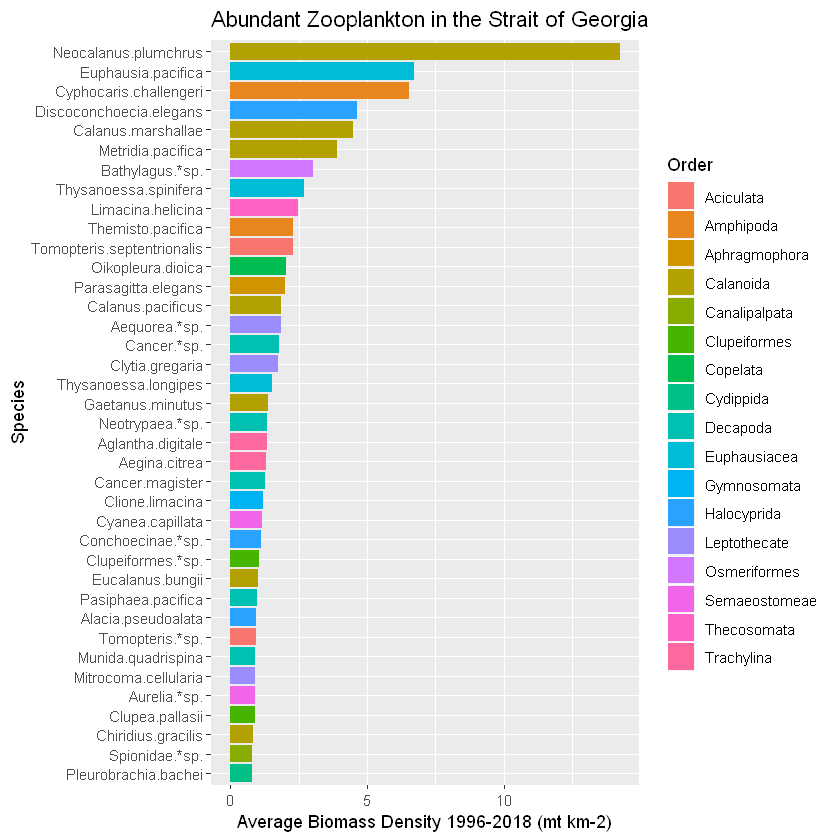

In [187]:
# only include groups above cutoff B dens value
df = a1996_2018_df_meanannualB_species %>%
  filter(meanB_annual_WW_mtkm2 >= 0.8)

library(ggplot2)
library(RColorBrewer)

# Note that a net-avoidance multiplier for Euphausiids may need to be applied here
# Basic barplot
p<-ggplot(data=df, 
          aes(x=reorder(Genus_species,meanB_annual_WW_mtkm2), 
              y=meanB_annual_WW_mtkm2, 
              fill=Order)) +
  geom_bar(stat="identity") + 
  #scale_fill_brewer(palette="Grey") +
  labs(title="Abundant Zooplankton in the Strait of Georgia", x="Species", y = "Average Biomass Density 1996-2018 (mt km-2)")
# note https://www.r-graph-gallery.com/38-rcolorbrewers-palettes.html

# Horizontal bar plot
p + coord_flip()

In [204]:
distinct(select(a1996_2018_df_meanannualB_species,Class),Class)

Adding missing grouping variables: `Order`, `Family`, `Genus`


Order,Family,Genus,Class
<fct>,<fct>,<fct>,<fct>
Actinopterygii,Actinopterygii,Fish,Actinopterygii
Clupeiformes,Clupeidae,Clupea,Actinopterygii
Clupeiformes,Clupeiformes,Clupeiformes,Actinopterygii
Clupeiformes,Engraulidae,Engraulis,Actinopterygii
Gadiformes,Gadidae,Gadidae,Actinopterygii
Gadiformes,Gadidae,Gadus,Actinopterygii
Gadiformes,Gadidae,Microgadus,Actinopterygii
Gadiformes,Gadidae,Theragra,Actinopterygii
Gadiformes,Merlucciidae,Merluccius,Actinopterygii


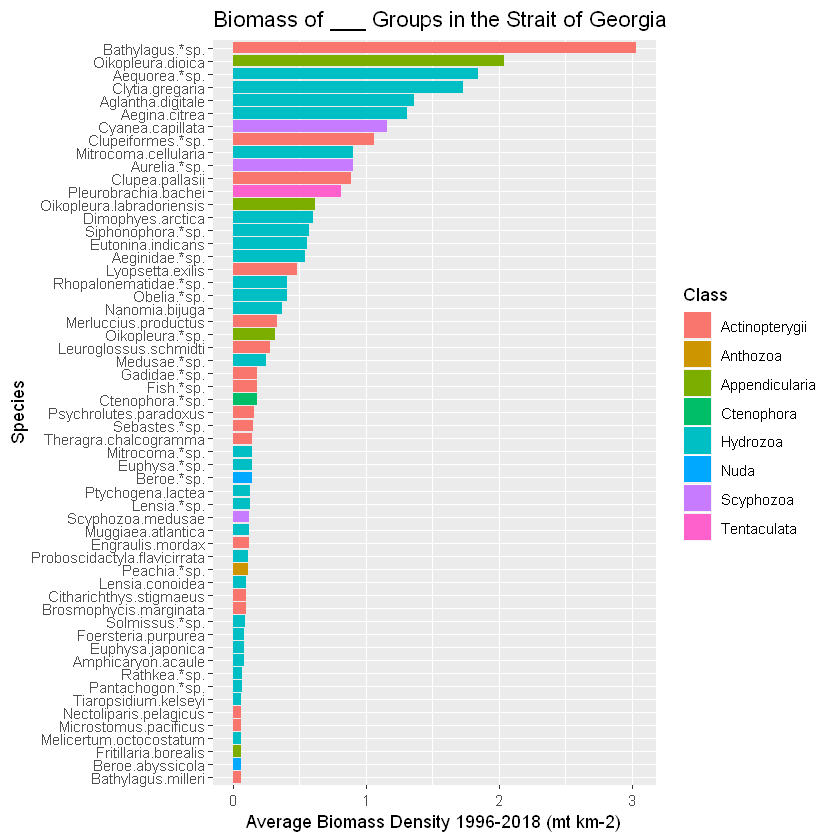

In [234]:
# softbodied
# only include groups above cutoff B dens value
df = a1996_2018_df_meanannualB_species %>%
  filter(meanB_annual_WW_mtkm2 >= 0.06) %>%
  filter(Phylum == "Cnidaria" | Phylum == "Ctenophora" | Phylum == "Chordata") 

library(ggplot2)
library(RColorBrewer)

# Basic barplot
p<-ggplot(data=df, 
          aes(x=reorder(Genus_species,meanB_annual_WW_mtkm2), 
              y=meanB_annual_WW_mtkm2, 
              fill=Class)) +
  geom_bar(stat="identity") + 
  #scale_fill_brewer(palette="Grey") +
  labs(title="Biomass of ___ Groups in the Strait of Georgia", x="Species", y = "Average Biomass Density 1996-2018 (mt km-2)")
# note https://www.r-graph-gallery.com/38-rcolorbrewers-palettes.html

# Horizontal bar plot
p + coord_flip()

In [224]:
# look at mean dry weight biomass
a1996_2018_df

Index,Region,Station,Longitude..N.,Latitude..W.,Year,Month,Day,Time,Twilight,...,Genus_species,Size_class_or_life_stage,Abundance.m3.,Average_biomass_per_individual.mg.,tow_depth_range,B_mg_m3_DW,B_g_m2_DW,B_g_m2_WW,season,towrange_as_prop_watercol
<fct>,<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>,<fct>,<fct>,...,<fct>,<fct>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
PBS1996051000101,Central Strait of Georgia,GEO1,-123.748,49.25,1996,2,12,12:00,Daylight,...,Tomopteris.septentrionalis,Tomopteris septentrionalis s2,2.86601,0.339998814,400,0.97444000,0.3897760004,2.595908162,winter,1
PBS1996051000101,Central Strait of Georgia,GEO1,-123.748,49.25,1996,2,12,12:00,Daylight,...,Cyphocaris.challengeri,Cyphocaris challengeri s2,0.09553,3.300115147,400,0.31526000,0.1261040000,0.839852640,winter,1
PBS1996051000101,Central Strait of Georgia,GEO1,-123.748,49.25,1996,2,12,12:00,Daylight,...,Cyphocaris.challengeri,Cyphocaris challengeri s3,0.38214,5.699926728,400,2.17817000,0.8712679999,5.802644880,winter,1
PBS1996051000101,Central Strait of Georgia,GEO1,-123.748,49.25,1996,2,12,12:00,Daylight,...,Themisto.pacifica,Themisto pacifica M,0.04777,2.099853465,400,0.10031000,0.0401240000,0.267225840,winter,1
PBS1996051000101,Central Strait of Georgia,GEO1,-123.748,49.25,1996,2,12,12:00,Daylight,...,Scina.borealis,Scina borealis F,0.02388,2.590452261,400,0.06186000,0.0247440000,0.164795040,winter,1
PBS1996051000101,Central Strait of Georgia,GEO1,-123.748,49.25,1996,2,12,12:00,Daylight,...,Scina.borealis,Scina borealis M,0.03583,2.589729277,400,0.09279000,0.0371160000,0.247192560,winter,1
PBS1996051000101,Central Strait of Georgia,GEO1,-123.748,49.25,1996,2,12,12:00,Daylight,...,Scina.borealis,Scina borealis s2,0.01194,1.289782245,400,0.01540000,0.0061600000,0.041025600,winter,1
PBS1996051000101,Central Strait of Georgia,GEO1,-123.748,49.25,1996,2,12,12:00,Daylight,...,Pasiphaea.pacifica,Pasiphaea pacifica s2,0.04777,1.399832531,400,0.06687000,0.0267480000,0.178141680,winter,1
PBS1996051000101,Central Strait of Georgia,GEO1,-123.748,49.25,1996,2,12,12:00,Daylight,...,Pasiphaea.pacifica,Pasiphaea pacifica s3,0.02388,4.560720268,400,0.10891000,0.0435640000,0.290136240,winter,1


In [228]:
a1996_2018_df %>%
  filter(Order == "Calanoida") %>%
  group_by(Phylum, Class, Order, Family, Genus, Genus_species, Size_class_or_life_stage) %>%
  #group_by(Class, season, Year) %>%
  summarise(meanBodyM_DW_mg = round(mean(Average_biomass_per_individual.mg., na.rm=FALSE),digits=2)) %>%
  arrange(desc(meanBodyM_DW_mg), .by_group = FALSE)


`summarise()` regrouping output by 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Genus_species' (override with `.groups` argument)


Phylum,Class,Order,Family,Genus,Genus_species,Size_class_or_life_stage,meanBodyM_DW_mg
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
Arthropoda,Maxillopoda,Calanoida,Aetideidae,Euchirella,Euchirella.grandicornis,Euchirella grandicornis 6F,3.52
Arthropoda,Maxillopoda,Calanoida,Calanidae,Neocalanus,Neocalanus.cristatus,Neocalanus cristatus 6F,2.73
Arthropoda,Maxillopoda,Calanoida,Calanidae,Neocalanus,Neocalanus.cristatus,Neocalanus cristatus 6M,2.07
Arthropoda,Maxillopoda,Calanoida,Aetideidae,Chirundina,Chirundina.streetsi,Chirundina streetsi 6F,1.94
Arthropoda,Maxillopoda,Calanoida,Euchaetidae,Paraeuchaeta,Paraeuchaeta.elongata,Paraeuchaeta elongata 6F,1.67
Arthropoda,Maxillopoda,Calanoida,Calanidae,Neocalanus,Neocalanus.cristatus,Neocalanus cristatus 5,1.62
Arthropoda,Maxillopoda,Calanoida,Scolecitrichidae,Scottocalanus,Scottocalanus.persecans,Scottocalanus persecans 6F,1.37
Arthropoda,Maxillopoda,Calanoida,Euchaetidae,Paraeuchaeta,Paraeuchaeta.elongata,Paraeuchaeta elongata 6M,1.11
Arthropoda,Maxillopoda,Calanoida,Aetideidae,Euchirella,Euchirella.*sp.,Euchirella *sp. 5,1.07


In [225]:
colnames(a1996_2018_df)

[1] "Index"                              "Region"                            
 [3] "Station"                            "Longitude..N."                     
 [5] "Latitude..W."                       "Year"                              
 [7] "Month"                              "Day"                               
 [9] "Time"                               "Twilight"                          
[11] "Net_type"                           "Net_Diameter.m."                   
[13] "Mesh_size.µm."                      "Tow_start_depth.m."                
[15] "Tow_end_depth.m."                   "Bottom_depth.m."                   
[17] "Volume.m3."                         "Phylum"                            
[19] "Class"                              "Order"                             
[21] "Family"                             "Genus"                             
[23] "Species"                            "Genus_species"                     
[25] "Size_class_or_life_stage"           "Abundance.m3."                     
[27] "Average_biomass_per_individual.mg." "tow_depth_range"                   
[29] "B_mg_m3_DW"                         "B_g_m2_DW"                         
[31] "B_g_m2_WW"                          "season"                            
[33] "towrange_as_prop_watercol"

In [ ]:
### Old Code below

In [20]:
# Is the method used to adjust euphausiid abundance based on day / night bias captured in the dataset? 
just_krill = a1996_2018_df %>%
filter(Family == "Euphausiidae")

just_krill_daytime = just_krill %>% 
filter(Twilight=="Daylight")

just_krill_night = just_krill %>% 
filter(Twilight == "Night")

print("Day")
summary(just_krill_daytime['B_g_m2_WW'])
print("Night")
summary(just_krill_night['B_g_m2_WW'])

[1] "Day"


   B_g_m2_WW        
 Min.   :   0.0077  
 1st Qu.:   0.6578  
 Median :   2.2355  
 Mean   :  15.6236  
 3rd Qu.:   9.4418  
 Max.   :2226.0887  

[1] "Night"


   B_g_m2_WW        
 Min.   :   0.0125  
 1st Qu.:   0.6978  
 Median :   2.2947  
 Mean   :  19.4435  
 3rd Qu.:   9.9523  
 Max.   :1196.7492  

In [94]:
just_krill %>% arrange(desc(B_mg_m3), .by_group = FALSE)

Index,Region,Station,Longitude..N.,Latitude..W.,Year,Month,Day,Time,Twilight,...,Order,Family,Genus,Species,Genus_species,Size_class_or_life_stage,Abundance.m3.,Average_biomass_per_individual.mg.,tow_depth_range,B_mg_m3
<fct>,<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<int>,<dbl>
PBS2009046001401,Northern Strait of Georgia,GS07,-124.937,49.829,2009,10,9,9:42,Daylight,...,Euphausiacea,Euphausiidae,Euphausia,pacifica,Euphausia.pacifica,Euphausia pacifica F,87.38498,8.500000,150,742.77234
PBS2009046001801,Northern Strait of Georgia,GS09,-124.714,49.814,2009,10,9,11:21,Daylight,...,Euphausiacea,Euphausiidae,Euphausia,pacifica,Euphausia.pacifica,Euphausia pacifica F,24.93639,8.499999,140,211.95929
IOS2018039016301,Northern Strait of Georgia,12,-124.680,49.725,2018,5,17,2:28,Night,...,Euphausiacea,Euphausiidae,Euphausia,pacifica,Euphausia.pacifica,Euphausia pacifica s2,268.65825,0.650000,343,174.62786
PBS1998017000401,Central Strait of Georgia,CPF1,-124.086,49.367,1998,7,15,21:02,Daylight,...,Euphausiacea,Euphausiidae,Euphausia,pacifica,Euphausia.pacifica,Euphausia pacifica F,19.90832,8.499998,250,169.22069
PBS2008014034001,Northern Strait of Georgia,GS11,-124.936,49.832,2008,7,4,16:46,Daylight,...,Euphausiacea,Euphausiidae,Euphausia,pacifica,Euphausia.pacifica,Euphausia pacifica F,19.81599,8.500002,150,168.43595
PBS2010017043101,Central Strait of Georgia,GS39,-123.275,49.017,2010,7,7,11:35,Daylight,...,Euphausiacea,Euphausiidae,Euphausia,pacifica,Euphausia.pacifica,Euphausia pacifica F,18.42160,8.500002,130,156.58363
PBS2008015032301,Northern Strait of Georgia,GS12,-124.252,49.705,2008,10,25,8:43,Daylight,...,Euphausiacea,Euphausiidae,Euphausia,pacifica,Euphausia.pacifica,Euphausia pacifica F,15.00000,8.500000,150,127.50000
PBS2014028008701,Northern Strait of Georgia,BS36,-124.719,49.648,2014,6,23,10:21,Daylight,...,Euphausiacea,Euphausiidae,Euphausia,pacifica,Euphausia.pacifica,Euphausia pacifica F,14.38202,8.500001,125,122.24719
PBS2008014034401,Northern Strait of Georgia,GS13,-124.714,49.815,2008,7,4,18:30,Daylight,...,Euphausiacea,Euphausiidae,Euphausia,pacifica,Euphausia.pacifica,Euphausia pacifica F,13.70005,8.500001,145,116.45044


In [93]:
# it appears as though these data have already been filtered
summary(a1996_2018_df['Bottom_depth.m.'])

 Bottom_depth.m.
 Min.   : 60    
 1st Qu.:244    
 Median :310    
 Mean   :296    
 3rd Qu.:380    
 Max.   :432    

### Simple mean biomass by volume ranked

In [133]:
# this block calculates the mean biomass density of zooplankton 
# (grouped by species but this can be altered in the group_by line)
# using the n_surveys calculated above to avoid biasing density estimates using these presence-only data
# (absent species are not reported in these data)
# data are first log transformed, then log-mean calculated, then logB converted back to B

a1996_2018_df_summary = a1996_2018_df %>% 
mutate(B_mg_m3 = Abundance.m3. * Average_biomass_per_individual.mg.) %>%
mutate(B_g_m2_DW = B_mg_m3 * tow_depth_range * 0.001) %>% #(g m-2 is equiv to mt km-2)
mutate(B_g_m2_WW_low = B_g_m2_DW * DW_to_WW_low) %>% 
mutate(B_g_m2_WW_high = B_g_m2_DW * DW_to_WW_high) %>% 
mutate(B_g_m2_WW_mid = ((B_g_m2_WW_low + B_g_m2_WW_high) / 2)) %>% 
mutate(logB_g_m2_WW_mid = log(B_g_m2_WW_mid)) %>% 
group_by(Class,Order,Family,Genus,Species,Genus_species) %>%
#group_by(Class,Order) %>%
summarise(B_sum_mg_m3 = sum(round(B_mg_m3, digits=2)),
          B_sum_g_m2_DW = sum(round(B_g_m2_DW, digits=2)),
          B_sum_g_m2_WW = sum(round(B_g_m2_WW_mid, digits=2)),
          logB_sum_g_m2_WW = sum(round(logB_g_m2_WW_mid, digits=2)),
          Body_size_mg_mean = mean(round(Average_biomass_per_individual.mg., digits=2)),
          n = n_surveys,
          n_occurrences = n()) %>%
mutate(B_mean_mg_m3 = round(B_sum_mg_m3, digits=2) / n) %>%
mutate(B_mean_g_m2_DW = round(B_sum_g_m2_DW, digits=2) / n) %>%
mutate(B_mean_g_m2_WW = round(B_sum_g_m2_WW, digits=2) / n) %>%
mutate(logB_mean_g_m2_WW = round(logB_sum_g_m2_WW, digits=2) / n) %>%
mutate(B_logmean_g_m2_WW = exp(logB_mean_g_m2_WW)) %>%
arrange(desc(B_logmean_g_m2_WW), .by_group = FALSE)
a1996_2018_df_summary

#mutate(B_mt_km2 = Biomass_mg_m3 * 0.001 * (abs(Tow_start_depth.m-Tow_end_depth.m)) ) %>%

`summarise()` regrouping output by 'Class', 'Order', 'Family', 'Genus', 'Species' (override with `.groups` argument)


Class,Order,Family,Genus,Species,Genus_species,B_sum_mg_m3,B_sum_g_m2_DW,B_sum_g_m2_WW,logB_sum_g_m2_WW,Body_size_mg_mean,n,n_occurrences,B_mean_mg_m3,B_mean_g_m2_DW,B_mean_g_m2_WW,logB_mean_g_m2_WW,B_logmean_g_m2_WW
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Malacostraca,Amphipoda,Cyphocarididae,Cyphocaris,challengeri,Cyphocaris.challengeri,5459.43,1513.81,11353.32,2204.69,3.71803969,760,1663,7.183460526,1.9918552632,14.938578947,2.900907895,18.190653
Ostracoda,Halocyprida,Halocyprididae,Discoconchoecia,elegans,Discoconchoecia.elegans,1900.55,551.95,4140.43,850.55,0.10000000,760,715,2.500723684,0.7262500000,5.447934211,1.119144737,3.062234
Maxillopoda,Calanoida,Calanidae,Calanus,marshallae,Calanus.marshallae,2108.06,638.72,4791.45,716.90,0.31694511,760,838,2.773763158,0.8404210526,6.304539474,0.943289474,2.568416
Malacostraca,Amphipoda,Hyperiidae,Themisto,pacifica,Themisto.pacifica,2874.50,680.44,5101.45,547.96,3.05529574,760,1454,3.782236842,0.8953157895,6.712434211,0.721000000,2.056489
Maxillopoda,Calanoida,Calanidae,Calanus,pacificus,Calanus.pacificus,3056.16,765.37,5738.26,458.09,0.14157115,760,2024,4.021263158,1.0070657895,7.550342105,0.602750000,1.827137
Malacostraca,Euphausiacea,Euphausiidae,Euphausia,pacifica,Euphausia.pacifica,9329.32,2034.70,15261.93,322.21,3.79435492,760,1899,12.275421053,2.6772368421,20.081486842,0.423960526,1.528001
Maxillopoda,Calanoida,Metridinidae,Metridia,pacifica,Metridia.pacifica,5346.35,1378.63,10339.05,308.73,0.06662925,760,2851,7.034671053,1.8139868421,13.604013158,0.406223684,1.501138
Ostracoda,Halocyprida,Halocyprididae,Conchoecinae,*sp.,Conchoecinae.*sp.,615.20,177.86,1333.81,195.14,0.08000000,760,513,0.809473684,0.2340263158,1.755013158,0.256763158,1.292739
Appendicularia,Copelata,Oikopleuridae,Oikopleura,dioica,Oikopleura.dioica,1060.36,199.22,1494.55,101.30,0.07000000,760,291,1.395210526,0.2621315789,1.966513158,0.133289474,1.142581


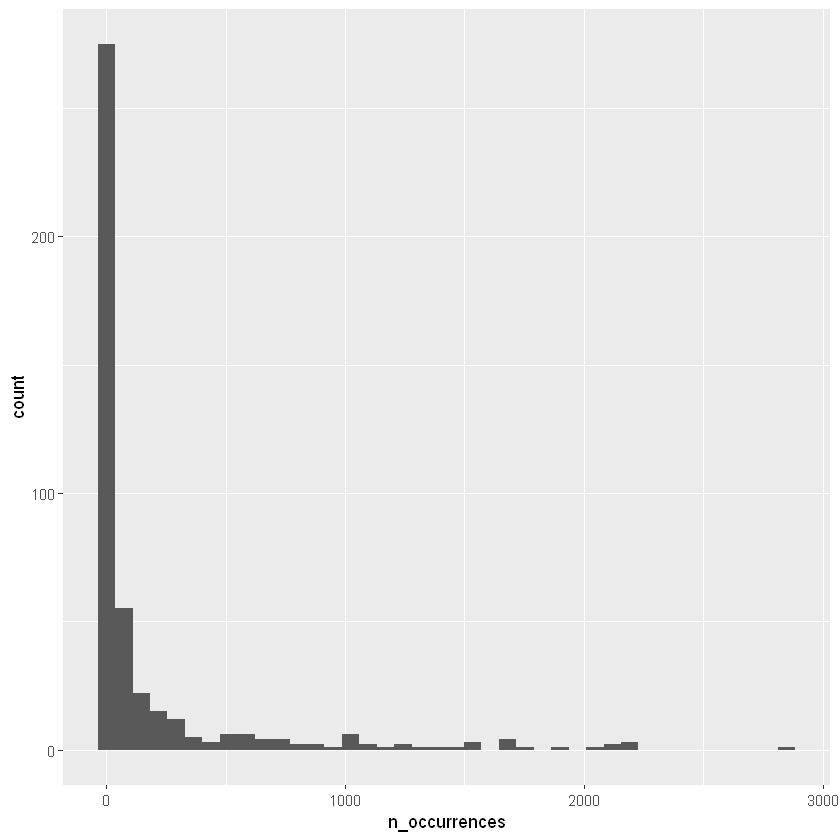

In [134]:
a1996_2018_df_summary %>%
  ggplot(aes(x=n_occurrences)) +
  geom_histogram(bins=40)

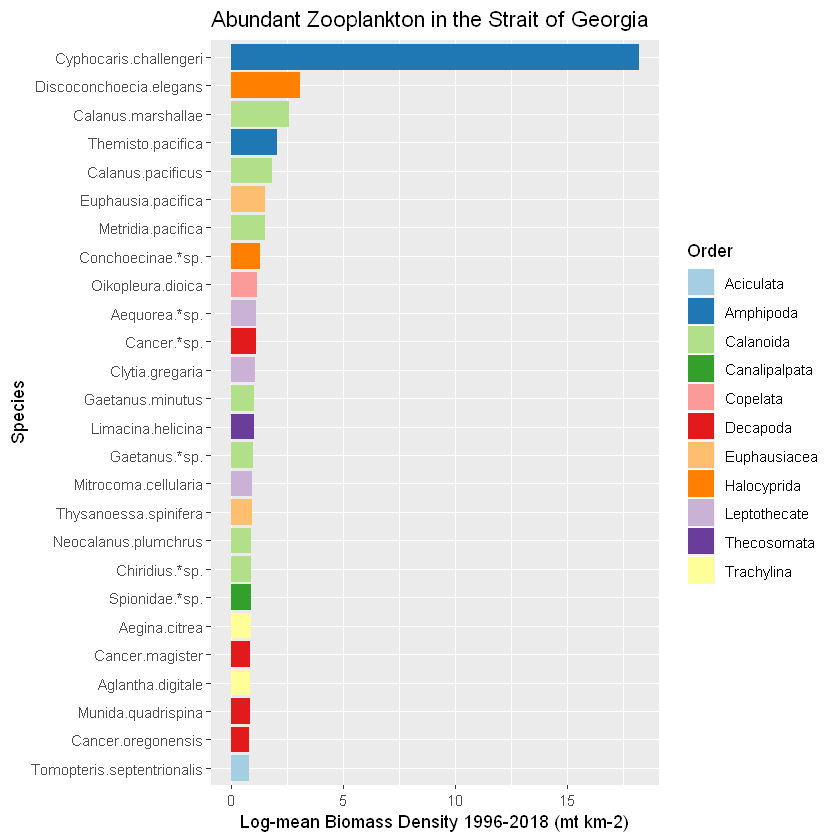

In [139]:
# only include groups above cutoff B dens value
a1996_2018_Bcutoff_df_summary = a1996_2018_df_summary %>%
filter(n_occurrences >= 100 & B_logmean_g_m2_WW >= 0.8)

library(ggplot2)
library(RColorBrewer)

# Basic barplot
p<-ggplot(data=a1996_2018_Bcutoff_df_summary, 
          aes(x=reorder(Genus_species,B_logmean_g_m2_WW), 
              y=B_logmean_g_m2_WW, 
              fill=Order)) +
  geom_bar(stat="identity") + 
scale_fill_brewer(palette="Paired") +
labs(title="Abundant Zooplankton in the Strait of Georgia", x="Species", y = "Log-mean Biomass Density 1996-2018 (mt km-2)")
# note https://www.r-graph-gallery.com/38-rcolorbrewers-palettes.html

# Horizontal bar plot
p + coord_flip()

### Same summary but only for CPF1 and CPF2

In [57]:
a1996_2018_CPF1_CPF2_df_summary = a1996_2018_df %>% 
filter(Station == "CPF1" | Station == "CPF2") %>%
mutate(B_mg_m3 = Abundance.m3. * Average_biomass_per_individual.mg.) %>%
mutate(B_g_m2_DW = B_mg_m3 * tow_depth_range * 0.001) %>% #(g m-2 is equiv to mt km-2)
mutate(B_g_m2_WW_low = B_g_m2_DW * DW_to_WW_low) %>% 
mutate(B_g_m2_WW_high = B_g_m2_DW * DW_to_WW_high) %>% 
mutate(B_g_m2_WW_mid = ((B_g_m2_WW_low + B_g_m2_WW_high) / 2)) %>% 
group_by(Class,Order,Family,Genus,Species,Genus_species) %>%
summarise(B_sum_mg_m3 = sum(round(B_mg_m3, digits=2)),
          B_sum_g_m2_DW = sum(round(B_g_m2_DW, digits=2)),
          B_sum_g_m2_WW = sum(round(B_g_m2_WW_mid, digits=2)),
          Body_size_mg_mean = mean(round(Average_biomass_per_individual.mg., digits=2)),
          n = n_surveys,
          n_occurrences = n()) %>%
mutate(B_mean_mg_m3 = round(B_sum_mg_m3, digits=2) / n) %>%
mutate(B_mean_g_m2_DW = round(B_sum_g_m2_DW, digits=2) / n) %>%
mutate(B_mean_g_m2_WW = round(B_sum_g_m2_WW, digits=2) / n) %>%
arrange(desc(B_mean_g_m2_WW), .by_group = FALSE)
a1996_2018_CPF1_CPF2_df_summary


`summarise()` regrouping output by 'Class', 'Order', 'Family', 'Genus', 'Species' (override with `.groups` argument)


Class,Order,Family,Genus,Species,Genus_species,B_sum_mg_m3,B_sum_g_m2_DW,B_sum_g_m2_WW,Body_size_mg_mean,n,n_occurrences,B_mean_mg_m3,B_mean_g_m2_DW,B_mean_g_m2_WW
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
Malacostraca,Euphausiacea,Euphausiidae,Euphausia,pacifica,Euphausia.pacifica,1436.91,382.79,2871.24,3.71843836,760,365,1.89067105,0.50367105,3.7779474
Malacostraca,Amphipoda,Cyphocarididae,Cyphocaris,challengeri,Cyphocaris.challengeri,1269.80,340.01,2550.46,3.80695793,760,309,1.67078947,0.44738158,3.3558684
Maxillopoda,Calanoida,Calanidae,Neocalanus,plumchrus,Neocalanus.plumchrus,1173.81,326.88,2451.56,0.37643192,760,213,1.54448684,0.43010526,3.2257368
Maxillopoda,Calanoida,Metridinidae,Metridia,pacifica,Metridia.pacifica,977.47,254.78,1910.63,0.06772455,760,501,1.28614474,0.33523684,2.5139868
Maxillopoda,Calanoida,Calanidae,Calanus,marshallae,Calanus.marshallae,524.93,150.16,1127.01,0.30038217,760,157,0.69069737,0.19757895,1.4829079
Maxillopoda,Calanoida,Calanidae,Calanus,pacificus,Calanus.pacificus,566.07,148.71,1114.95,0.14526471,760,340,0.74482895,0.19567105,1.4670395
Gastropoda,Thecosomata,Limacinidae,Limacina,helicina,Limacina.helicina,537.48,141.28,1060.03,0.19351351,760,185,0.70721053,0.18589474,1.3947763
Malacostraca,Amphipoda,Hyperiidae,Themisto,pacifica,Themisto.pacifica,437.59,117.91,883.67,3.35200000,760,240,0.57577632,0.15514474,1.1627237
Ostracoda,Halocyprida,Halocyprididae,Discoconchoecia,elegans,Discoconchoecia.elegans,405.10,105.48,791.28,0.10000000,760,129,0.53302632,0.13878947,1.0411579


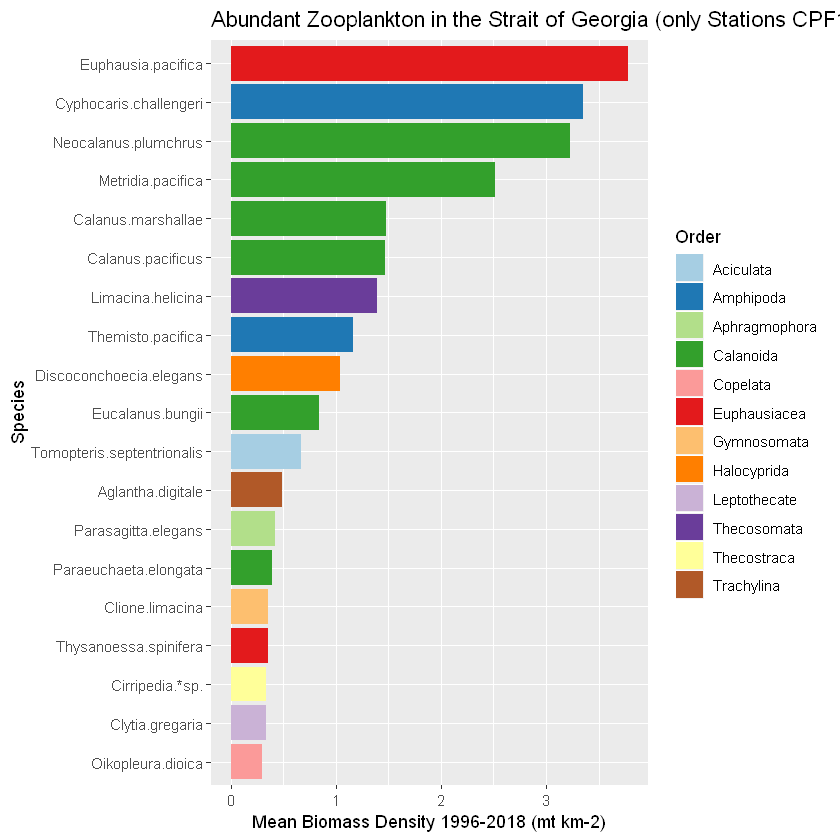

In [68]:
# only include groups above cutoff B dens value
a1996_2018__CPF1_CPF2_Bcutoff_df_summary = a1996_2018_CPF1_CPF2_df_summary %>%
filter(B_mean_g_m2_WW >= 0.297)

library(ggplot2)
library(RColorBrewer)

# Basic barplot
p2<-ggplot(data=a1996_2018__CPF1_CPF2_Bcutoff_df_summary, 
          aes(x=reorder(Genus_species,B_mean_g_m2_WW), 
              y=B_mean_g_m2_WW, 
              fill=Order)) +
  geom_bar(stat="identity") + 
scale_fill_brewer(palette="Paired") +
labs(title="Abundant Zooplankton in the Strait of Georgia (only Stations CPF1 & CPF2)", x="Species", y = "Mean Biomass Density 1996-2018 (mt km-2)")
# note https://www.r-graph-gallery.com/38-rcolorbrewers-palettes.html

# Horizontal bar plot
p2 + coord_flip()

In [101]:
# checking whole community biomass
whole = a1996_2018_df %>% 
mutate(B_mg_m3 = Abundance.m3. * Average_biomass_per_individual.mg.) %>%
mutate(B_g_m2_DW = B_mg_m3 * tow_depth_range * 0.001) %>% #(g m-2 is equiv to mt km-2)
mutate(B_g_m2_WW_low = B_g_m2_DW * DW_to_WW_low) %>% 
mutate(B_g_m2_WW_high = B_g_m2_DW * DW_to_WW_high) %>% 
mutate(B_g_m2_WW_mid = ((B_g_m2_WW_low + B_g_m2_WW_high) / 2)) %>% 
group_by(Phylum) %>%
summarise(B_sum_mg_m3 = sum(round(B_mg_m3, digits=2)),
          B_sum_g_m2_DW = sum(round(B_g_m2_DW, digits=2)),
          B_sum_g_m2_WW = sum(round(B_g_m2_WW_mid, digits=2)),
          Body_size_mg_mean = mean(round(Average_biomass_per_individual.mg., digits=2)),
          n = n_surveys,
          n_occurrences = n()) %>%
mutate(B_mean_mg_m3 = round(B_sum_mg_m3, digits=2) / n) %>%
mutate(B_mean_g_m2_DW = round(B_sum_g_m2_DW, digits=2) / n) %>%
mutate(B_mean_g_m2_WW = round(B_sum_g_m2_WW, digits=2) / n) %>%
arrange(desc(B_mean_g_m2_WW), .by_group = TRUE)
sum(whole['B_mean_g_m2_WW'])

`summarise()` ungrouping output (override with `.groups` argument)


[1] 146.4941

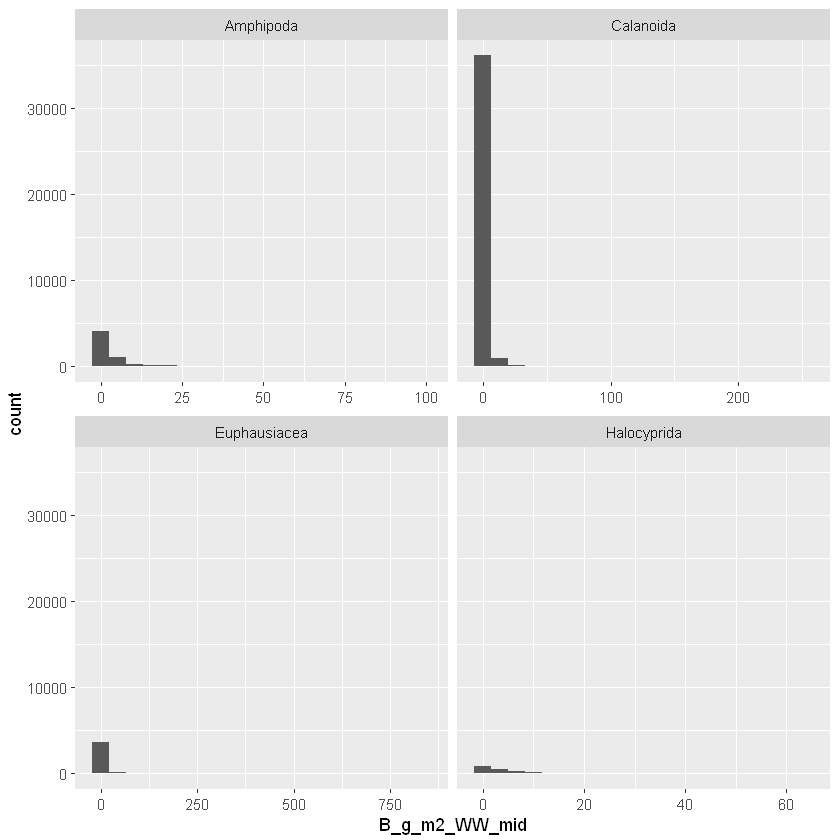

In [32]:
# histograms by species
a1996_2018_df %>%
  filter(Order == "Euphausiacea" | Order == "Amphipoda" | Order == "Calanoida" | Order == "Halocyprida") %>%
  mutate(B_mg_m3 = Abundance.m3. * Average_biomass_per_individual.mg.) %>%
  mutate(B_g_m2_DW = B_mg_m3 * tow_depth_range * 0.001) %>% #(g m-2 is equiv to mt km-2)
  mutate(B_g_m2_WW_low = B_g_m2_DW * DW_to_WW_low) %>% 
  mutate(B_g_m2_WW_high = B_g_m2_DW * DW_to_WW_high) %>% 
  mutate(B_g_m2_WW_mid = ((B_g_m2_WW_low + B_g_m2_WW_high) / 2)) %>%
  ggplot(aes(x=B_g_m2_WW_mid)) + 
  geom_histogram(bins=20) + 
  facet_wrap(~Order, scales = 'free_x')

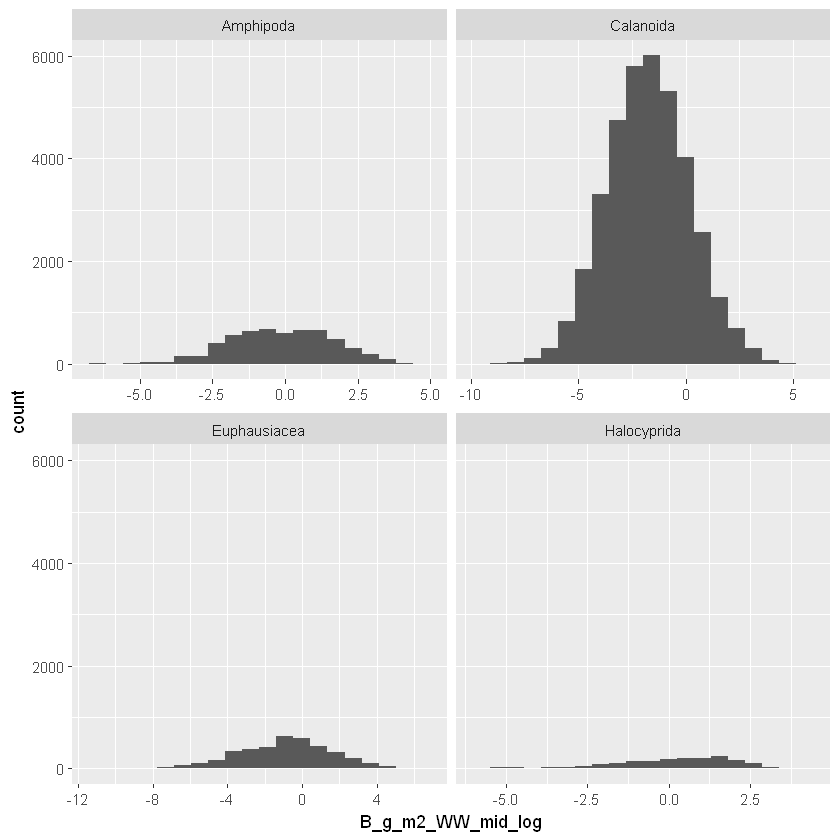

In [43]:
# histograms w/ log-transformed B
a1996_2018_df %>%
  filter(Order == "Euphausiacea" | Order == "Amphipoda" | Order == "Calanoida" | Order == "Halocyprida") %>%
  mutate(B_mg_m3 = Abundance.m3. * Average_biomass_per_individual.mg.) %>%
  mutate(B_g_m2_DW = B_mg_m3 * tow_depth_range * 0.001) %>% #(g m-2 is equiv to mt km-2)
  mutate(B_g_m2_WW_low = B_g_m2_DW * DW_to_WW_low) %>% 
  mutate(B_g_m2_WW_high = B_g_m2_DW * DW_to_WW_high) %>% 
  mutate(B_g_m2_WW_mid = ((B_g_m2_WW_low + B_g_m2_WW_high) / 2)) %>%
  mutate(B_g_m2_WW_mid_log = log(B_g_m2_WW_mid)) %>%
  ggplot(aes(x=B_g_m2_WW_mid_log)) + 
  geom_histogram(bins=20) + 
  facet_wrap(~Order, scales = 'free_x')

In [ ]:
# test for lognormal distribution of measurements using goft library lnorm_test
# - library / test can't handle large sample sizes so must group by something above species

In [95]:
# it looks like some data are normal, some are lognormal. 
# install.packages("goft", repos='http://cran.us.r-project.org')
library(ggplot2)

test_df = a1996_2018_df %>%
  mutate(B_mg_m3 = Abundance.m3. * Average_biomass_per_individual.mg.) %>%
  mutate(B_g_m2_DW = B_mg_m3 * tow_depth_range * 0.001) %>% #(g m-2 is equiv to mt km-2)
  mutate(B_g_m2_WW_low = B_g_m2_DW * DW_to_WW_low) %>% 
  mutate(B_g_m2_WW_high = B_g_m2_DW * DW_to_WW_high) %>% 
  mutate(B_g_m2_WW_mid = ((B_g_m2_WW_low + B_g_m2_WW_high) / 2)) %>% 
  mutate(logB_g_m2_WW_mid = log(B_g_m2_WW_mid))


In [141]:
Euphausiacea_df = test_df %>%
  filter( Order == "Euphausiacea")
lnorm_test(pull(Euphausiacea_df,B_g_m2_WW_mid))

Calanoida_df = test_df %>%
  filter( Order == "Calanoida") %>%
  sample_n(4999, replace=TRUE)
lnorm_test(pull(Calanoida_df,B_g_m2_WW_mid))

Amphipoda_df = test_df %>%
  filter( Order == "Amphipoda") %>%
  sample_n(4999, replace=TRUE)
lnorm_test(pull(Amphipoda_df,B_g_m2_WW_mid))

Halocyprida_df = test_df %>%
  filter( Order == "Halocyprida") 
lnorm_test(pull(Halocyprida_df,B_g_m2_WW_mid))

Cyphocaris_df = test_df %>%
  filter( Genus == "Cyphocaris") 
lnorm_test(pull(Cyphocaris_df,B_g_m2_WW_mid))

Discoconchoecia_df = test_df %>%
  filter( Genus == "Discoconchoecia") 
lnorm_test(pull(Discoconchoecia_df,B_g_m2_WW_mid))

Nplumchrus_df = test_df %>%
  filter( Genus_species == "Neocalanus.plumchrus") 
lnorm_test(pull(Nplumchrus_df,B_g_m2_WW_mid))


	Test for the lognormal distribution based on a transformation to
	normality

data:  pull(Euphausiacea_df, B_g_m2_WW_mid)
p-value = 1.856e-08



	Test for the lognormal distribution based on a transformation to
	normality

data:  pull(Calanoida_df, B_g_m2_WW_mid)
p-value = 0.4412



	Test for the lognormal distribution based on a transformation to
	normality

data:  pull(Amphipoda_df, B_g_m2_WW_mid)
p-value = 2.433e-12



	Test for the lognormal distribution based on a transformation to
	normality

data:  pull(Halocyprida_df, B_g_m2_WW_mid)
p-value < 2.2e-16



	Test for the lognormal distribution based on a transformation to
	normality

data:  pull(Cyphocaris_df, B_g_m2_WW_mid)
p-value = 1.027e-05



	Test for the lognormal distribution based on a transformation to
	normality

data:  pull(Discoconchoecia_df, B_g_m2_WW_mid)
p-value = 1.09e-15



	Test for the lognormal distribution based on a transformation to
	normality

data:  pull(Nplumchrus_df, B_g_m2_WW_mid)
p-value = 4.862e-09


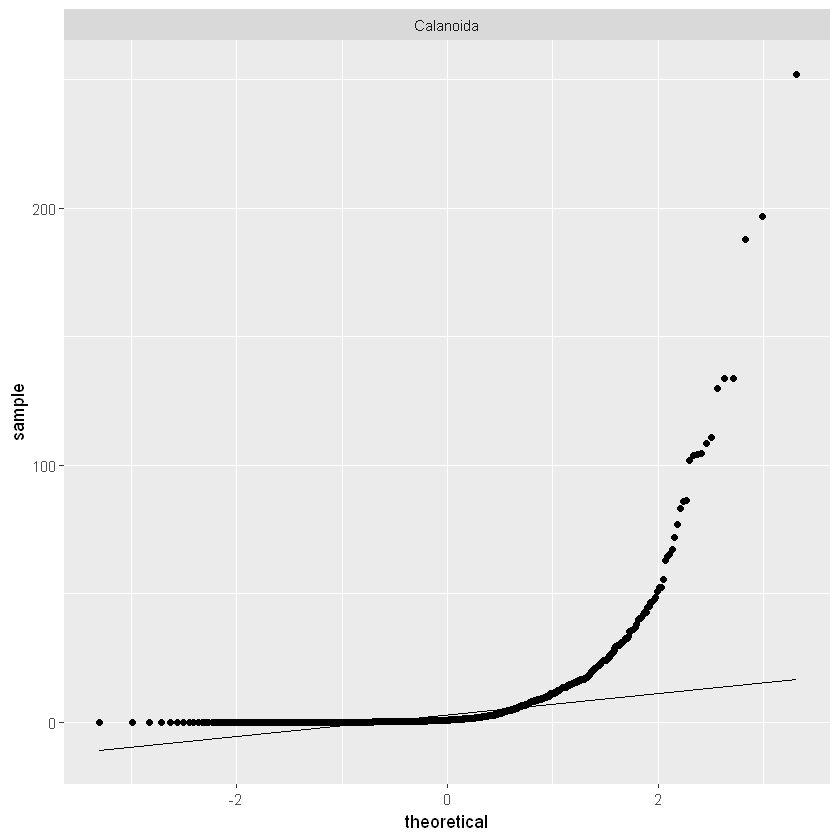

In [142]:
Nplumchrus_df %>% 
  ggplot(aes(sample=B_g_m2_WW_mid)) + 
  stat_qq() + stat_qq_line() +
  facet_wrap(~Order, scales = 'free_x')

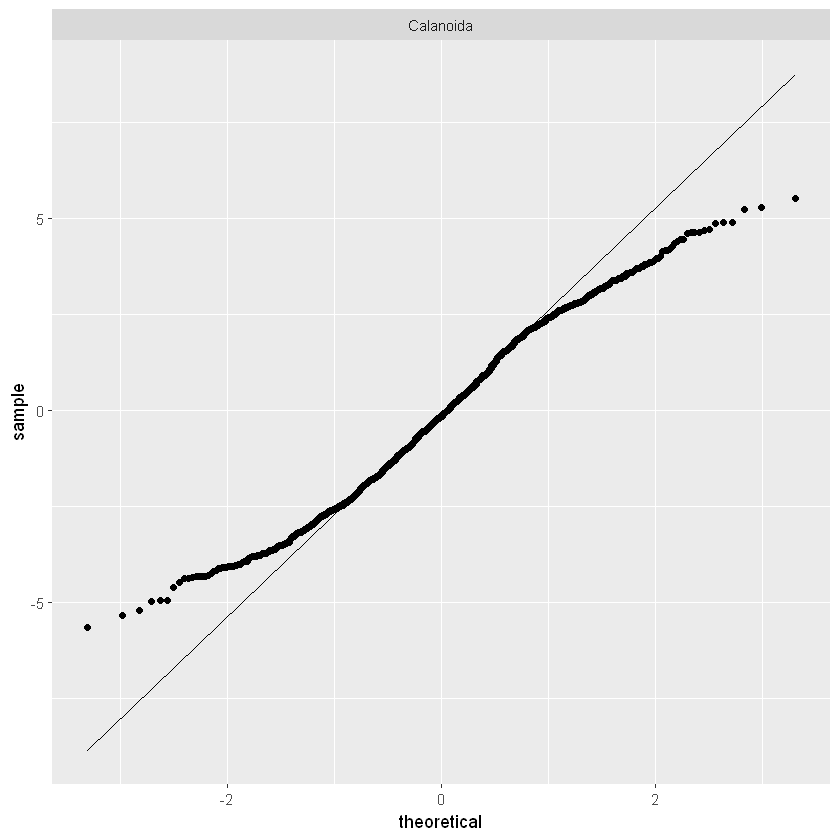

In [143]:
Nplumchrus_df %>% 
  ggplot(aes(sample=log(B_g_m2_WW_mid))) + 
  stat_qq() + stat_qq_line() +
  facet_wrap(~Order, scales = 'free_x')

In [88]:
Epacifica_df

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"

Index,Region,Station,Longitude..N.,Latitude..W.,Year,Month,Day,Time,Twilight,...,Genus_species,Size_class_or_life_stage,Abundance.m3.,Average_biomass_per_individual.mg.,tow_depth_range,B_mg_m3,B_g_m2_DW,B_g_m2_WW_low,B_g_m2_WW_high,B_g_m2_WW_mid
<fct>,<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>,<fct>,<fct>,...,<fct>,<fct>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
